# House price

In [1]:
#importing libraries 


# Data Manipulation
import numpy as np
import pandas as pd

# Feature selection
from sklearn.feature_selection import VarianceThreshold


# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# for Q-Q plots
import scipy.stats as stats

#import model libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#import model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor



#import accuracy
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score



import warnings
warnings.filterwarnings('ignore')

## Load Data

In [2]:
# load data

train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
test_ID=test['Id']

In [4]:
train.drop(columns=['Id'], inplace= True)
test.drop(columns=['Id'], inplace= True)

In [5]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train.shape

(1460, 80)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [8]:
#encoding categorical variable

enc_ordCat= { 'LotShape': {'Reg': 3 , 'IR1': 2 , 'IR2': 1 , 'IR3': 0 },
              'LandSlope': {'Gtl': 2 , 'Mod': 1 , 'Sev': 0},
              'ExterQual': {'Ex': 4 , 'Gd': 3 , 'TA': 2 , 'Fa': 1 , 'Po': 0},
              'ExterCond': {'Ex': 4 , 'Gd': 3 , 'TA': 2 , 'Fa': 1 , 'Po': 0},
              'BsmtQual': {'Ex': 5 , 'Gd': 4 , 'TA': 3 , 'Fa': 2 , 'Po': 1 , 'NA': 0},
              'BsmtCond': {'Ex': 5 , 'Gd': 4 , 'TA': 3 , 'Fa': 2 , 'Po': 1 , 'NA': 0},
              'BsmtExposure': {'Gd': 4 , 'Av': 3 , 'Mn': 2 , 'No': 1 , 'NA': 0},
              'BsmtFinType1': {'GLQ': 6 , 'ALQ': 5 , 'BLQ': 4 , 'Rec': 3 , 'LwQ': 2 , 'Unf': 1 , 'NA': 0},
              'BsmtFinType2': {'GLQ': 6 , 'ALQ': 5 , 'BLQ': 4 , 'Rec': 3 , 'LwQ': 2 , 'Unf': 1 , 'NA': 0},
              'HeatingQC': {'Ex': 4 , 'Gd': 3 , 'TA': 2 , 'Fa': 1 , 'Po': 0},
              'CentralAir': {'Y': 1 , 'N': 0},
              'KitchenQual': {'Ex': 4 , 'Gd': 3 , 'TA': 2 , 'Fa': 1 , 'Po': 0},
              'Functional': {'Typ': 7, 'Min1': 6 , 'Min2': 5 , 'Mod': 4 , 'Maj1': 3 , 'Maj2': 2 , 'Sev': 1 , 'Sal': 0},
              'FireplaceQu': {'Ex': 5 , 'Gd': 4 , 'TA': 3 , 'Fa': 2 , 'Po': 1 , 'NA': 0},
              'GarageType': {'2Types': 6 , 'Attchd': 5 , 'Basment': 4 , 'BuiltIn': 3 , 'CarPort': 2 , 'Detchd': 1 , 'NA': 0},
              'GarageFinish': {'Fin': 3 , 'RFn': 2 , 'Unf': 1 , 'NA': 0 },
              'GarageQual': {'Ex': 5 , 'Gd': 4 , 'TA': 3 , 'Fa': 2 , 'Po': 1 , 'NA': 0},
              'GarageCond': {'Ex': 5 , 'Gd': 4 , 'TA': 3 , 'Fa': 2 , 'Po': 1 , 'NA': 0},
              'PavedDrive': {'Y': 2 , 'P': 1 , 'N': 0}
}

In [9]:
li=list(enc_ordCat.keys())
li

['LotShape',
 'LandSlope',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive']

In [10]:
train=train.replace(enc_ordCat)
test=test.replace(enc_ordCat)

In [11]:
train[li] = train[li].apply(pd.to_numeric)
test[li] = test[li].apply(pd.to_numeric)

## Split numeric and categorical feature

In [12]:
train_cat=list(train.columns[train.dtypes=='object'])
train_num=list(train.columns[train.dtypes!='object'])

In [13]:
train[train_cat].head(1)

,MSZoning,Street,Alley,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,...,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,...,VinylSd,BrkFace,PConc,GasA,SBrkr,NaN,NaN,NaN,WD,Normal


In [14]:
train_num

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'LotShape',
 'LandSlope',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

## Replace missing value for numerical features

In [15]:
train[train_num].isnull().sum().sort_values(ascending=False)

FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageQual        81
GarageFinish      81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtFinType1      37
BsmtCond          37
MasVnrArea         8
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
HeatingQC          0
CentralAir         0
BsmtFinSF1         0
SalePrice          0
2ndFlrSF           0
ExterCond          0
ExterQual          0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
OverallQual        0
LandSlope          0
LotShape           0
LotArea            0
1stFlrSF           0
BsmtFullBath       0
LowQualFinSF       0
GrLivArea          0
MoSold             0
MiscVal            0
PoolArea           0
ScreenPorch        0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
PavedDrive         0
GarageArea         0
GarageCars         0
Fireplaces         0
Functional         0
TotRmsAbvGrd 

#### Lets deal with one feature at time

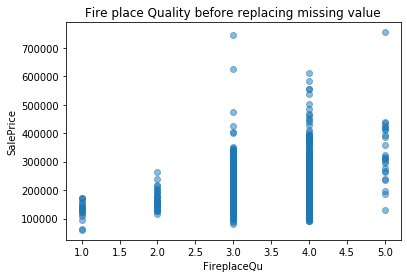

In [16]:
# 1. FireplaceQu 

plt.scatter(x=train['FireplaceQu'], y=train['SalePrice'], alpha=0.5)


# Decorate
plt.title('Fire place Quality before replacing missing value')
plt.xlabel('FireplaceQu')
plt.ylabel('SalePrice')
plt.show()

In [17]:
train.FireplaceQu.value_counts()

4.0    380
3.0    313
2.0     33
5.0     24
1.0     20
Name: FireplaceQu, dtype: int64

In [18]:
miss_val = np.where(train['FireplaceQu'].isnull(), 0 ,None)

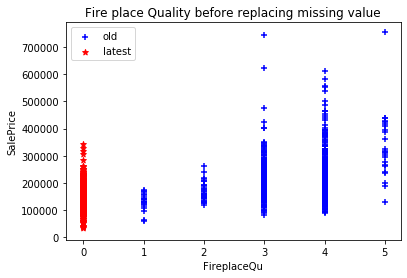

In [19]:
plt.scatter(x=train['FireplaceQu'],y=train['SalePrice'], color='blue', marker="+", label='old')
plt.scatter(x=miss_val,y=train['SalePrice'],  marker="*", color='red', label='latest')


plt.title('Fire place Quality before replacing missing value')
plt.xlabel('FireplaceQu')
plt.ylabel('SalePrice')
plt.legend(loc='upper left');
plt.show()

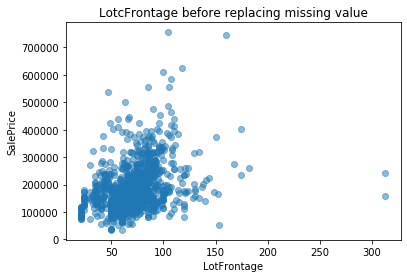

In [20]:
# 2. LotFrontage

plt.scatter(train['LotFrontage'], train['SalePrice'], alpha=0.5)

# Decorate
plt.title('LotcFrontage before replacing missing value')
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')
plt.show()

In [21]:
train['LotFrontage'].mean()

70.04995836802665

In [22]:
miss_val=np.where(train['LotFrontage'].isnull(),train['LotFrontage'].mean(),None)

In [23]:
# most of the data is in between 50 to 100, lets replace the missing value with mean.

train['LotFrontage']=train['LotFrontage'].fillna(train['LotFrontage'].mean())

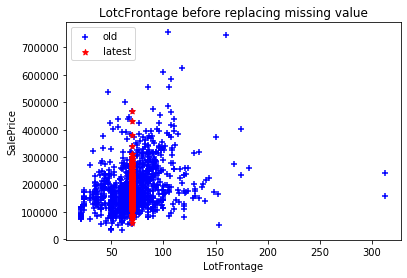

In [24]:
plt.scatter(x=train['LotFrontage'],y=train['SalePrice'], color='blue', marker="+", label='old')
plt.scatter(x=miss_val,y=train['SalePrice'],  marker="*", color='red', label='latest')


# Decorate
plt.title('LotcFrontage before replacing missing value')
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')
plt.legend(loc='upper left');
plt.show()

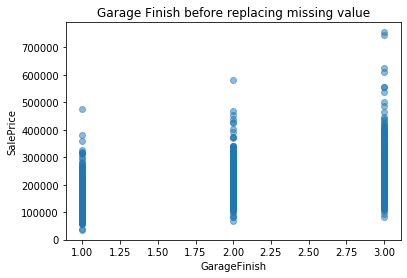

In [25]:
# 3. GarageFinish

plt.scatter( train['GarageFinish'], train['SalePrice'], alpha=0.5)

# Decorate
plt.title('Garage Finish before replacing missing value')
plt.xlabel('GarageFinish')
plt.ylabel('SalePrice')
plt.show()

In [26]:
train['GarageFinish'].mean()

1.8165337200870195

In [27]:
miss_val=np.where(train['GarageFinish'].isnull(),train['GarageFinish'].mean(),None)

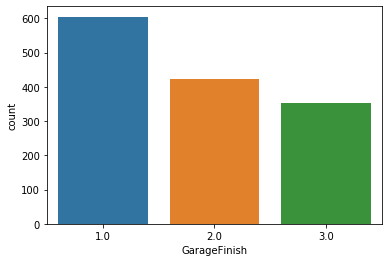

In [28]:
sns.countplot(train['GarageFinish'])

In [29]:
# Lets replae with mean value

train['GarageFinish']=train['GarageFinish'].fillna(train['GarageFinish'].mean())

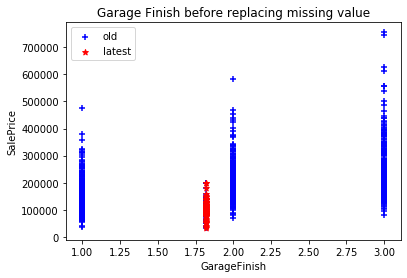

In [30]:
plt.scatter(x=train['GarageFinish'],y=train['SalePrice'], color='blue', marker="+", label='old')
plt.scatter(x=miss_val,y=train['SalePrice'],  marker="*", color='red', label='latest')


# Decorate
plt.title('Garage Finish before replacing missing value')
plt.xlabel('GarageFinish')
plt.ylabel('SalePrice')
plt.legend(loc='upper left');
plt.show()

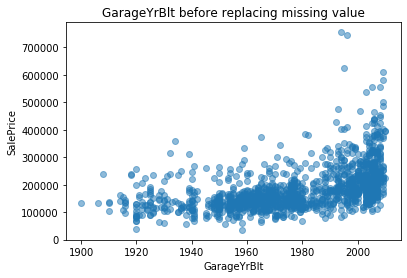

In [31]:
# 4. GarageYrBlt

plt.scatter(train['GarageYrBlt'], train['SalePrice'], alpha=0.5)

# Decorate
plt.title('GarageYrBlt before replacing missing value')
plt.xlabel('GarageYrBlt')
plt.ylabel('SalePrice')
plt.show()

In [32]:
train['GarageYrBlt'].mode()

0    2005.0
dtype: float64

In [33]:
train['GarageYrBlt'].mean()

1978.5061638868744

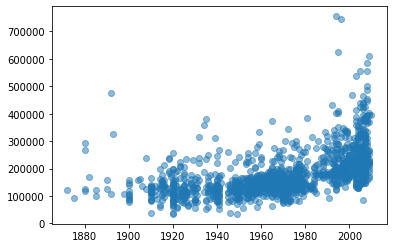

In [34]:
plt.scatter(train['YearBuilt'], train['SalePrice'], alpha=0.5)

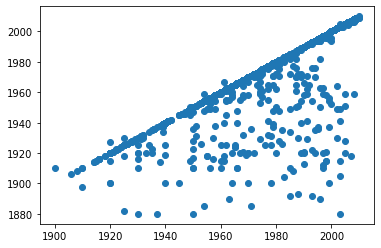

In [35]:
plt.scatter(train['GarageYrBlt'],train['YearBuilt'])

##### from the above graph it seems like the garage was built in same year in which the house was build, so lets map the same year for garage.

In [36]:
train[train['GarageYrBlt'].isnull()][['GarageYrBlt','YearBuilt']]

,GarageYrBlt,YearBuilt
39,NaN,1955
48,NaN,1920
78,NaN,1968
88,NaN,1915
89,NaN,1994
...,...,...
1349,NaN,1872
1407,NaN,1985
1449,NaN,1970
1450,NaN,1974


In [37]:
miss_val=np.zeros(train.shape[0])

In [38]:
indx=list(train[train['GarageYrBlt'].isnull()][['GarageYrBlt','YearBuilt']].index)

In [39]:
miss_val==0

array([ True,  True,  True, ...,  True,  True,  True])

In [40]:
for i in indx:
    miss_val[i]=train['YearBuilt'][i]
    train['GarageYrBlt'][i]=train['YearBuilt'][i]
   

In [41]:
miss_val=np.where(miss_val==0, None, miss_val)

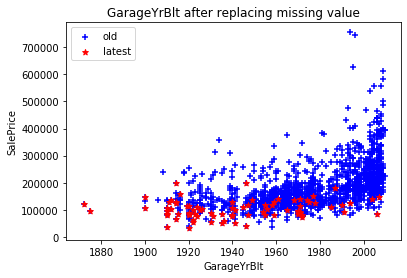

In [42]:
plt.scatter(x=train['GarageYrBlt'],y=train['SalePrice'], color='blue', marker="+", label='old')
plt.scatter(x=miss_val,y=train['SalePrice'],  marker="*", color='red', label='latest')


# Decorate
plt.title('GarageYrBlt after replacing missing value')
plt.xlabel('GarageYrBlt')
plt.ylabel('SalePrice')
plt.legend(loc='upper left');
plt.show()

In [43]:
train[train_num].isnull().sum().sort_values(ascending=False)

FireplaceQu      690
GarageType        81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtQual          37
BsmtCond          37
MasVnrArea         8
BsmtFinSF2         0
BsmtFinSF1         0
BsmtUnfSF          0
TotalBsmtSF        0
HeatingQC          0
CentralAir         0
1stFlrSF           0
SalePrice          0
LowQualFinSF       0
ExterCond          0
ExterQual          0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
OverallQual        0
LandSlope          0
LotShape           0
LotArea            0
LotFrontage        0
2ndFlrSF           0
BsmtFullBath       0
GrLivArea          0
GarageCars         0
MoSold             0
MiscVal            0
PoolArea           0
ScreenPorch        0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
PavedDrive         0
GarageArea         0
GarageFinish       0
YrSold             0
GarageYrBlt        0
Fireplaces         0
Functional   

In [44]:
# 'GarageType'

train.GarageType.value_counts()

5.0    870
1.0    387
3.0     88
4.0     19
2.0      9
6.0      6
Name: GarageType, dtype: int64

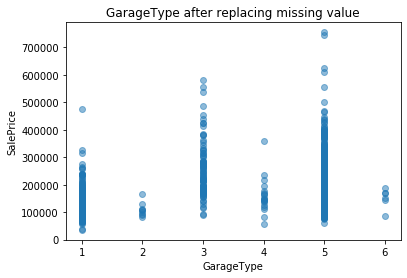

In [45]:
plt.scatter(train['GarageType'],train['SalePrice'], alpha=0.5)

# Decorate
plt.title('GarageType after replacing missing value')
plt.xlabel('GarageType')
plt.ylabel('SalePrice')
plt.show()

In [46]:
train['GarageType'].mean()

3.720812182741117

In [47]:
miss_val=np.where(train['GarageType'].isnull(),train['GarageType'].mode()[0] ,None)

In [48]:
# lets replace with mode()

train['GarageType']=train['GarageType'].fillna(train['GarageType'].mode()[0])

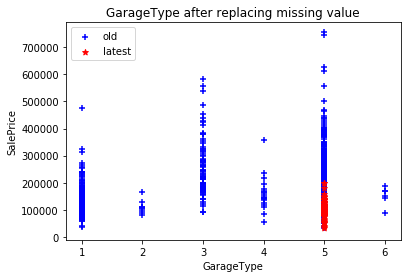

In [49]:
plt.scatter(x=train['GarageType'],y=train['SalePrice'], color='blue', marker="+", label='old')
plt.scatter(x=miss_val,y=train['SalePrice'],  marker="*", color='red', label='latest')


# Decorate
plt.title('GarageType after replacing missing value')
plt.xlabel('GarageType')
plt.ylabel('SalePrice')
plt.legend(loc='upper left');
plt.show()

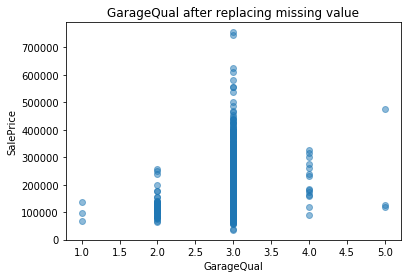

In [50]:
## 'GarageQual'

plt.scatter(train['GarageQual'],train['SalePrice'], alpha=0.5)

# Decorate
plt.title('GarageQual after replacing missing value')
plt.xlabel('GarageQual')
plt.ylabel('SalePrice')
plt.show()

In [51]:
train.GarageQual.value_counts()

3.0    1311
2.0      48
4.0      14
1.0       3
5.0       3
Name: GarageQual, dtype: int64

In [52]:
# lets replace with mode()

train['GarageQual']=train['GarageQual'].fillna(train['GarageQual'].mode()[0])

In [53]:
# GarageCond

train.GarageCond.value_counts()

3.0    1326
2.0      35
4.0       9
1.0       7
5.0       2
Name: GarageCond, dtype: int64

In [54]:
train['GarageCond']=train['GarageCond'].fillna(train['GarageCond'].mode()[0])

In [55]:
# BsmtExposure

train.BsmtExposure.value_counts()

1.0    953
3.0    221
4.0    134
2.0    114
Name: BsmtExposure, dtype: int64

In [56]:
train['BsmtExposure']=train['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0])

In [57]:
# BsmtFinType2

train.BsmtFinType2.value_counts()

1.0    1256
3.0      54
2.0      46
4.0      33
5.0      19
6.0      14
Name: BsmtFinType2, dtype: int64

In [58]:
train['BsmtFinType2']=train['BsmtFinType2'].fillna(train['BsmtFinType2'].mode()[0])

In [59]:
# BsmtCond

train.BsmtCond.value_counts()

3.0    1311
4.0      65
2.0      45
1.0       2
Name: BsmtCond, dtype: int64

In [60]:
train['BsmtCond']=train['BsmtCond'].fillna(train['BsmtCond'].mode()[0])

In [61]:
train[train_num].isnull().sum().sort_values(ascending=False)

FireplaceQu      690
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
SalePrice          0
BsmtExposure       0
2ndFlrSF           0
1stFlrSF           0
CentralAir         0
HeatingQC          0
TotalBsmtSF        0
BsmtUnfSF          0
BsmtFinSF2         0
BsmtFinType2       0
BsmtFinSF1         0
BsmtCond           0
GrLivArea          0
ExterCond          0
ExterQual          0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
OverallQual        0
LandSlope          0
LotShape           0
LotArea            0
LotFrontage        0
LowQualFinSF       0
BsmtFullBath       0
YrSold             0
GarageArea         0
MoSold             0
MiscVal            0
PoolArea           0
ScreenPorch        0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
PavedDrive         0
GarageCond         0
GarageQual         0
GarageCars         0
BsmtHalfBath       0
GarageFinish       0
GarageYrBlt        0
GarageType         0
Fireplaces   

In [62]:
# BsmtQual

train['BsmtQual'].value_counts()

3.0    649
4.0    618
5.0    121
2.0     35
Name: BsmtQual, dtype: int64

In [63]:
train['BsmtQual'].mean()

3.5797610681658467

In [64]:
train['BsmtQual']=train['BsmtQual'].fillna(train['BsmtQual'].mean())

In [65]:
# BsmtFinType1

train['BsmtFinType1'].value_counts()

1.0    430
6.0    418
5.0    220
4.0    148
3.0    133
2.0     74
Name: BsmtFinType1, dtype: int64

In [66]:
train['BsmtFinType1'].mean()

3.6380885453267746

In [67]:
train['BsmtFinType1']=train['BsmtFinType1'].fillna(train['BsmtFinType1'].mean())

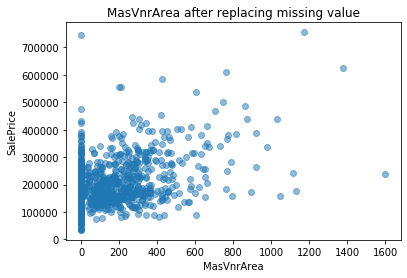

In [68]:
# MasVnrArea

plt.scatter(train['MasVnrArea'], train['SalePrice'], alpha=0.5)

# Decorate
plt.title('MasVnrArea after replacing missing value')
plt.xlabel('MasVnrArea')
plt.ylabel('SalePrice')
plt.show()

In [69]:
train['MasVnrArea'].mean()

103.68526170798899

In [70]:
train['MasVnrArea']=train['MasVnrArea'].fillna(train['MasVnrArea'].mean())

In [71]:
train[train_num].isnull().sum().sort_values(ascending=False)

FireplaceQu      690
SalePrice          0
GrLivArea          0
2ndFlrSF           0
1stFlrSF           0
CentralAir         0
HeatingQC          0
TotalBsmtSF        0
BsmtUnfSF          0
BsmtFinSF2         0
BsmtFinType2       0
BsmtFinSF1         0
BsmtFinType1       0
BsmtExposure       0
BsmtCond           0
BsmtQual           0
ExterCond          0
ExterQual          0
MasVnrArea         0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
OverallQual        0
LandSlope          0
LotShape           0
LotArea            0
LotFrontage        0
LowQualFinSF       0
BsmtFullBath       0
YrSold             0
GarageArea         0
MoSold             0
MiscVal            0
PoolArea           0
ScreenPorch        0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
PavedDrive         0
GarageCond         0
GarageQual         0
GarageCars         0
BsmtHalfBath       0
GarageFinish       0
GarageYrBlt        0
GarageType         0
Fireplaces   

#### Done with numerical missing value, Lets see categorical missing value

In [72]:
train[train_cat].isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType          8
Electrical          1
SaleCondition       0
Condition2          0
Street              0
LandContour         0
Utilities           0
LotConfig           0
Neighborhood        0
Condition1          0
RoofStyle           0
BldgType            0
HouseStyle          0
SaleType            0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
Foundation          0
Heating             0
MSZoning            0
dtype: int64

In [73]:
miss_feat= list(train.columns[train.isnull().any()])

In [74]:
miss_feat

['Alley',
 'MasVnrType',
 'Electrical',
 'FireplaceQu',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [75]:
## replace all the missin value with text 'missing'

for col in miss_feat:
    train[col]=np.where(train[col].isnull(),'missing', train[col])

In [76]:
train.isnull().sum().sort_values(ascending=False)

SalePrice        0
SaleCondition    0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
                ..
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
MSSubClass       0
Length: 80, dtype: int64

#### All the missing value is handled

In [77]:
train.shape

(1460, 80)

#### Now Lets combine some of the features to single feature.

In [78]:
column=train.columns

In [79]:
column

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [80]:
def similar_feat(arr,st):
    
    li=[]
    
    for ele in arr:
        if st in ele:
            li.append(ele)
    return li

In [81]:
basement=similar_feat(column,'Bsmt')
print(basement)

['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']


In [82]:
def print_value_count(feat):
    
    for ele in feat:
        print('the different value of {} is {}'.format(ele, train[ele].nunique()))
        print(train[ele].value_counts(),'\n')
        

In [83]:
print_value_count(basement)

the different value of BsmtQual is 5
3.000000    649
4.000000    618
5.000000    121
3.579761     37
2.000000     35
Name: BsmtQual, dtype: int64 

the different value of BsmtCond is 4
3.0    1348
4.0      65
2.0      45
1.0       2
Name: BsmtCond, dtype: int64 

the different value of BsmtExposure is 4
1.0    991
3.0    221
4.0    134
2.0    114
Name: BsmtExposure, dtype: int64 

the different value of BsmtFinType1 is 7
1.000000    430
6.000000    418
5.000000    220
4.000000    148
3.000000    133
2.000000     74
3.638089     37
Name: BsmtFinType1, dtype: int64 

the different value of BsmtFinSF1 is 637
0       467
24       12
16        9
20        5
686       5
       ... 
1032      1
1022      1
599       1
1018      1
1904      1
Name: BsmtFinSF1, Length: 637, dtype: int64 

the different value of BsmtFinType2 is 6
1.0    1294
3.0      54
2.0      46
4.0      33
5.0      19
6.0      14
Name: BsmtFinType2, dtype: int64 

the different value of BsmtFinSF2 is 144
0       1293
180    

#### From above analysis we can conclude that all the quality and condition features can be combine to single feature say 'BsmtScore'. 

In [84]:
def add_feat(feat,feat_list):
    
    train[feat]=pd.Series([0]*1460)
    for ele in feat_list:
        train[feat]=train[feat]+ train[ele]

In [85]:
add_feat('BsmtScore',['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',  'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath'])

In [86]:
train[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',  'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath','BsmtScore']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtScore
0,4.0,3.0,1.0,6.0,1.0,1,0,16.0
1,4.0,3.0,4.0,5.0,1.0,0,1,18.0
2,4.0,3.0,2.0,6.0,1.0,1,0,17.0
3,3.0,4.0,1.0,5.0,1.0,1,0,15.0
4,4.0,3.0,3.0,6.0,1.0,1,0,18.0
...,...,...,...,...,...,...,...,...
1455,4.0,3.0,1.0,1.0,1.0,0,0,10.0
1456,4.0,3.0,1.0,5.0,3.0,1,0,17.0
1457,3.0,4.0,1.0,6.0,1.0,0,0,15.0
1458,3.0,3.0,2.0,6.0,3.0,1,0,18.0


In [87]:
# Now for the features related to Basement area, we can observe that (BsmtFinSF1 + BsmtFinSF2) + BsmtUnfSF = TotalBsmtSF

# So here only keeping BsmtUnfSF , TotalBsmtSF would be enough , i mean keeping any 2 of these features should suffice.

In [88]:
train[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']]

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
0,706,0,150,856
1,978,0,284,1262
2,486,0,434,920
3,216,0,540,756
4,655,0,490,1145
...,...,...,...,...
1455,0,0,953,953
1456,790,163,589,1542
1457,275,0,877,1152
1458,49,1029,0,1078


In [89]:
# Lets drop the remaining features for Basement.

train.drop(['BsmtFinSF1','BsmtFinSF2','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'], axis=1 , inplace=True)

In [90]:
# Similary Garage have also many number of features

garage=similar_feat(column,'Garage')
print(garage)

['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']


In [91]:
def print_value_count(feat):
    
    for ele in feat:
        print('the different value of {} is {}'.format(ele, train[ele].nunique()))
        print(train[ele].value_counts(),'\n')
        

In [92]:
print_value_count(garage)

the different value of GarageType is 6
5.0    951
1.0    387
3.0     88
4.0     19
2.0      9
6.0      6
Name: GarageType, dtype: int64 

the different value of GarageYrBlt is 102
2005.0    65
2006.0    60
2004.0    54
2007.0    50
2003.0    50
          ..
1872.0     1
1927.0     1
1906.0     1
1911.0     1
1933.0     1
Name: GarageYrBlt, Length: 102, dtype: int64 

the different value of GarageFinish is 4
1.000000    605
2.000000    422
3.000000    352
1.816534     81
Name: GarageFinish, dtype: int64 

the different value of GarageCars is 5
2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64 

the different value of GarageArea is 441
0       81
440     49
576     47
240     38
484     34
        ..
754      1
459      1
458      1
756      1
1418     1
Name: GarageArea, Length: 441, dtype: int64 

the different value of GarageQual is 5
3.0    1392
2.0      48
4.0      14
1.0       3
5.0       3
Name: GarageQual, dtype: int64 

the different value of GarageCond

#### Here also we can combine some features like ['GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond'] to single feature say GarageScore

In [93]:
add_feat('GarageScore',['GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond'])

In [94]:
train[['GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond','GarageScore']]

,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,GarageScore
0,5.0,2.0,2,3.0,3.0,15.0
1,5.0,2.0,2,3.0,3.0,15.0
2,5.0,2.0,2,3.0,3.0,15.0
3,1.0,1.0,3,3.0,3.0,11.0
4,5.0,2.0,3,3.0,3.0,16.0
...,...,...,...,...,...,...
1455,5.0,2.0,2,3.0,3.0,15.0
1456,5.0,1.0,2,3.0,3.0,14.0
1457,5.0,2.0,1,3.0,3.0,14.0
1458,5.0,1.0,1,3.0,3.0,13.0


In [95]:
train.drop(['GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond'],axis=1, inplace=True)

In [96]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageYrBlt', 'GarageArea', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition', 'SalePrice', 'BsmtScore', 'GarageScore'],
      dtype='object'

In [97]:
# combine ExterCond and ExterQual to one feature

add_feat('ExtrScore',['ExterCond', 'ExterQual'])

In [98]:
train[['ExterCond', 'ExterQual','ExtrScore']]

,ExterCond,ExterQual,ExtrScore
0,2,3,5
1,2,2,4
2,2,3,5
3,2,2,4
4,2,3,5
...,...,...,...
1455,2,2,4
1456,2,2,4
1457,3,4,7
1458,2,2,4


In [99]:
# combine ExterCond and ExterQual to one feature

add_feat('OvrallScore',['OverallQual', 'OverallCond'])

In [100]:
train[['OverallQual', 'OverallCond','OvrallScore']]

,OverallQual,OverallCond,OvrallScore
0,7,5,12
1,6,8,14
2,7,5,12
3,7,5,12
4,8,5,13
...,...,...,...
1455,6,5,11
1456,6,6,12
1457,7,9,16
1458,5,6,11


In [101]:
train.drop(['OverallQual', 'OverallCond','ExterQual','ExtrScore'], axis=1, inplace=True)

In [102]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterCond', 'Foundation',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice',
       'BsmtScore', 'GarageScore', 'OvrallScore'],
      dtype='object')

In [103]:
# Similary Garage have also many number of features

Lot=similar_feat(column,'Lot')
print(Lot)

['LotFrontage', 'LotArea', 'LotShape', 'LotConfig']


In [104]:
def print_value_count(feat):
    
    for ele in feat:
        print('the different value of {} is {}'.format(ele, train[ele].nunique()))
        print(train[ele].value_counts(),'\n')
        

In [105]:
print_value_count(Lot)

the different value of LotFrontage is 111
70.049958     259
60.000000     143
70.000000      70
80.000000      69
50.000000      57
             ... 
106.000000      1
38.000000       1
140.000000      1
138.000000      1
137.000000      1
Name: LotFrontage, Length: 111, dtype: int64 

the different value of LotArea is 1073
7200     25
9600     24
6000     17
10800    14
9000     14
         ..
7094      1
6130      1
9337      1
5232      1
8190      1
Name: LotArea, Length: 1073, dtype: int64 

the different value of LotShape is 4
3    925
2    484
1     41
0     10
Name: LotShape, dtype: int64 

the different value of LotConfig is 5
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64 



In [106]:
## these above features cannot be combine

In [107]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterCond', 'Foundation',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice',
       'BsmtScore', 'GarageScore', 'OvrallScore'],
      dtype='object')

In [108]:
train.Fireplaces.value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

In [109]:
train_cat=list(train.columns[train.dtypes=='object'])
train_num=list(train.columns[train.dtypes!='object'])

## Remove constant features

In [110]:
# Checking ZERO variance for categorical features

# to find variables that contain only 1 label/value
# we use the nunique() method from pandas, which returns the number
# of different values in a variable.

constant_feat_cat = [feat for feat in train[train_cat].columns if train[train_cat][feat].nunique() == 1]

constant_feat_cat

[]

In [111]:
# Checking ZERO variance for numerical features


# This method works for only numeric features.
# short and easy: find constant features

# in this dataset, all features are numeric,


constant_feat_num = [feat for feat in train[train_num].columns if train[train_num][feat].std() == 0]

constant_feat_num

[]

## Quasi feature selection (remove features having very low variance)

In [112]:
len(train_num)

39

In [113]:
# method 1:

sel = VarianceThreshold(threshold=0.05)  

sel.fit(train[train_num])  # fit finds the features with low variance

VarianceThreshold(threshold=0.05)

In [114]:
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [115]:
col_to_drop=train[train_num].columns[~sel.get_support()][0]

In [116]:
col_to_drop

'KitchenAbvGr'

In [117]:
train.drop(col_to_drop,axis=1,inplace=True)

In [118]:
# Method 2: find the columns which have more than 99% same value.

def find_low_var_col(df,threshold):
    low_var_col=[]
    row=df.shape[0]
    for col in df.columns:
        mode_count=(df[col]==(df[col].mode()[0])).sum()
        if ((mode_count/row)*100) > threshold :
            low_var_col.append(col)
            
    return low_var_col

In [119]:
train_low_var=find_low_var_col(train, 99)

In [120]:
train_low_var

['Street', 'Utilities', 'PoolArea', 'PoolQC']

In [121]:
train.drop(train_low_var,axis=1,inplace=True)

In [122]:
train.shape

(1460, 59)

### Check for duplicate features

In [123]:
train_cat=list(train.columns[train.dtypes=='object'])
train_num=list(train.columns[train.dtypes!='object'])

In [124]:
# check for duplicated features in the training set
def find_duplicate_feat(df):
 
        duplicated_feat = []
        for i in range(0, len(df.columns)):

            col_1 = df.columns[i]

            for col_2 in df.columns[i + 1:]:
                if (col_2 not in duplicated_feat) and (df[col_1].equals(df[col_2])):
                    duplicated_feat.append(col_2)

        return duplicated_feat

In [125]:
train_num_dup=find_duplicate_feat(train[train_num])

In [126]:
train_num_dup

[]

In [127]:
train_cat_dup=find_duplicate_feat(train[train_cat])

In [128]:
train_cat_dup

[]

## Correlation feature selection

(40, 0)

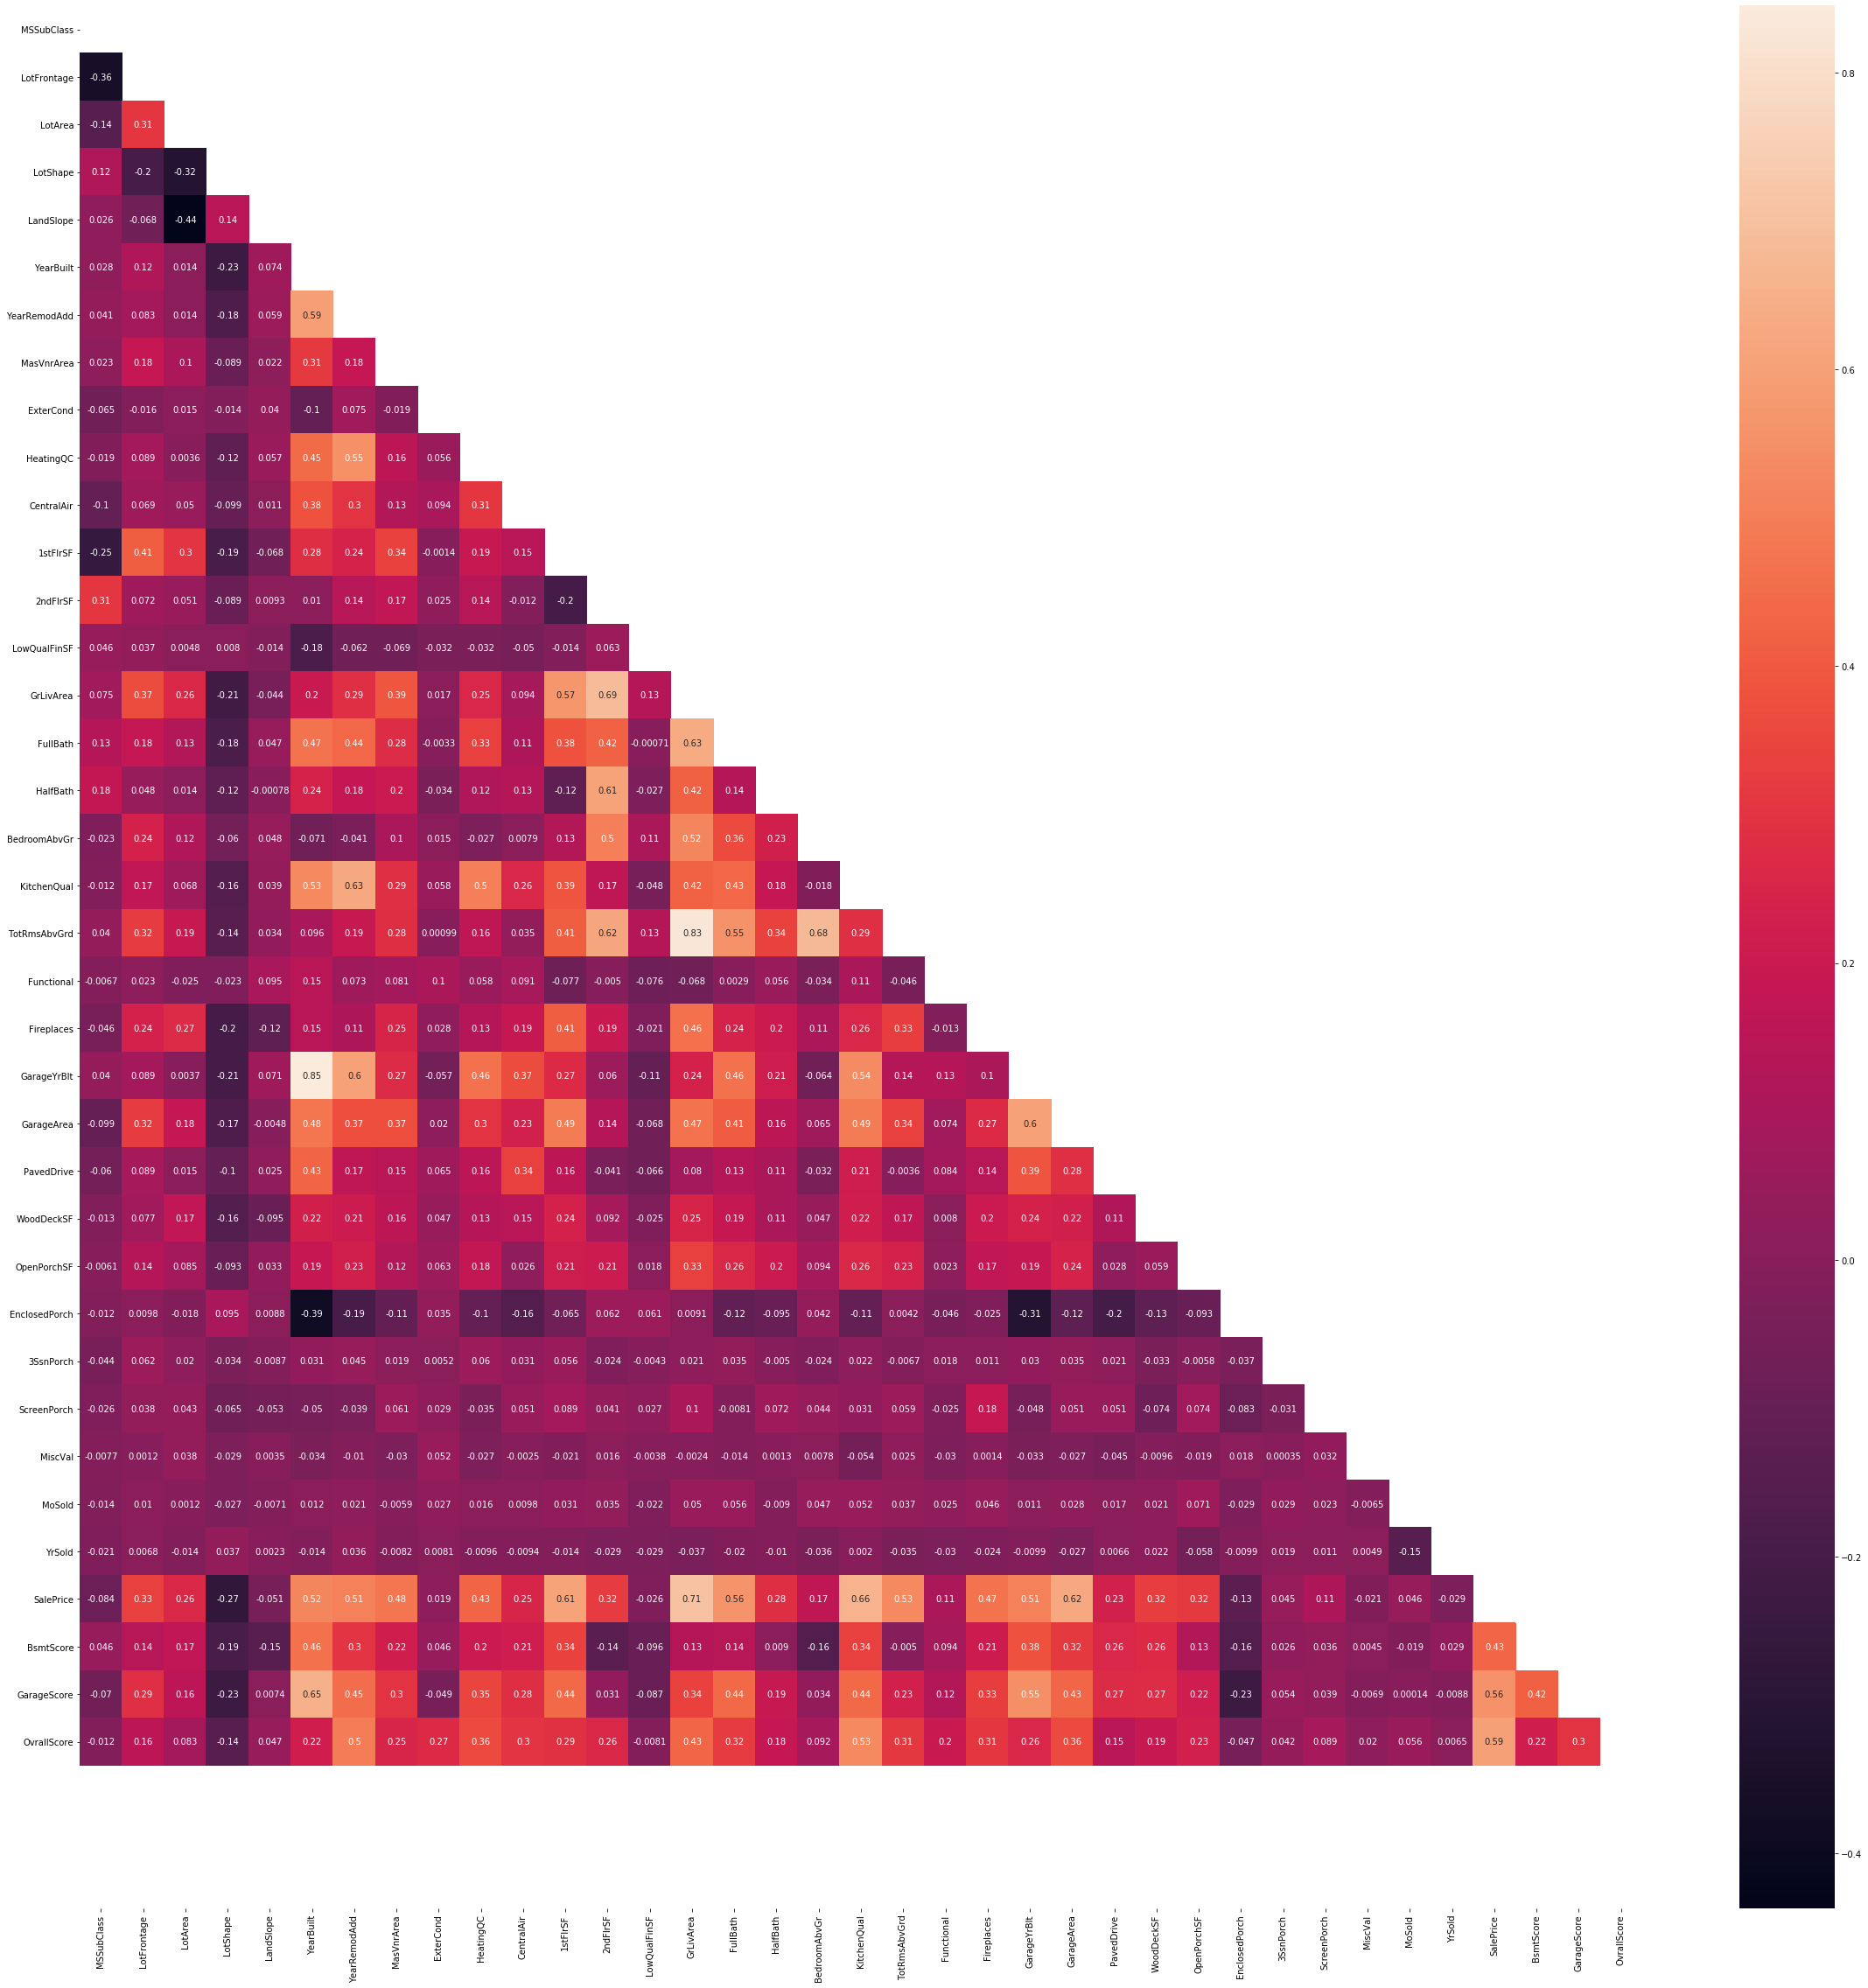

In [129]:
plt.figure(figsize=(40,40))
sns.heatmap(train.corr(),annot=True, mask=np.triu(train.corr()))
plt.ylim(40,0)

In [130]:
# find list of high correlated features with other features. to overcome multicollinearity

def high_corr_feat():
    
    feat = set()  # Set of all features which are highely correlated to other feature.
    corr_matrix = train.corr()
    
    for i in range(1,len(corr_matrix.columns)):
        for j in range(i):
    
            if ((corr_matrix.iloc[i, j]) > 0.8) or ((corr_matrix.iloc[i, j])<-0.4):
                colname = corr_matrix.columns[i]  # getting the name of column
                feat.add(colname)
    
    return list(feat)

In [131]:
train_hgh_corr_col=high_corr_feat()

In [132]:
train_hgh_corr_col

['GarageYrBlt', 'TotRmsAbvGrd', 'LandSlope']

In [133]:
train.drop(train_hgh_corr_col, axis=1, inplace=True)

In [134]:
train.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,Neighborhood,Condition1,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,BsmtScore,GarageScore,OvrallScore
0,60,RL,65.0,8450,missing,3,Lvl,Inside,CollgCr,Norm,...,missing,0,2,2008,WD,Normal,208500,16.0,15.0,12
1,20,RL,80.0,9600,missing,3,Lvl,FR2,Veenker,Feedr,...,missing,0,5,2007,WD,Normal,181500,18.0,15.0,14


In [135]:
# drop dependent feature.

y=train['SalePrice']

train=train.drop('SalePrice', axis=1)

In [136]:
# function to create distribution, histogram, Q-Q plot and boxplot


def diagnostic_plots(df):
    # function takes a dataframe (df) and
    # the list of variables of interest as arguments

    col=df._get_numeric_data().columns
    
    for ele in col:
        
        # define figure size
        plt.figure(figsize=(16, 4))
        
        # distribution
        plt.subplot(1, 4, 1)
        sns.distplot(df[ele])
        plt.title('Distribution')
        
        # histogram
        plt.subplot(1, 4, 2)
        sns.histplot(df[ele], bins=30)
        plt.title('Histogram')

        # Q-Q plot
        plt.subplot(1, 4, 3)
        stats.probplot(df[ele], dist="norm", plot=plt)
        plt.ylabel('Variable quantiles')

        # boxplot
        plt.subplot(1, 4, 4)
        sns.boxplot(y=df[ele])
        plt.title('Boxplot')
        
        
        plt.show()

    

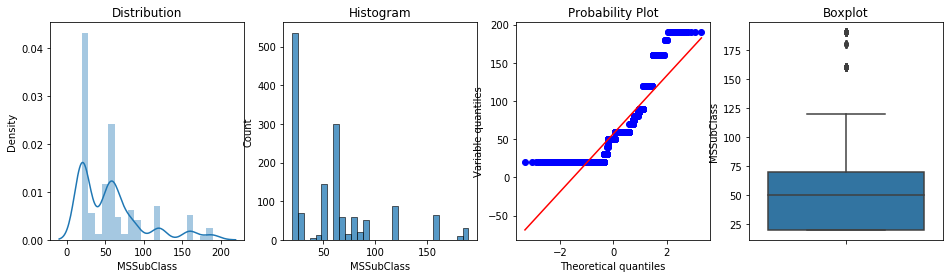

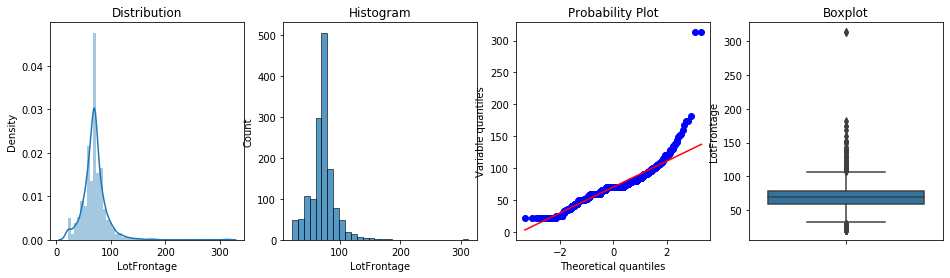

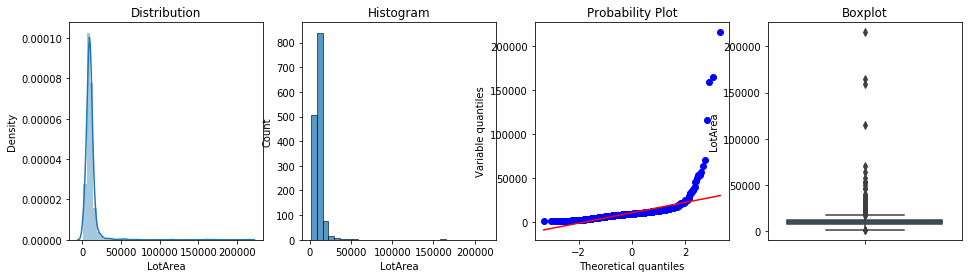

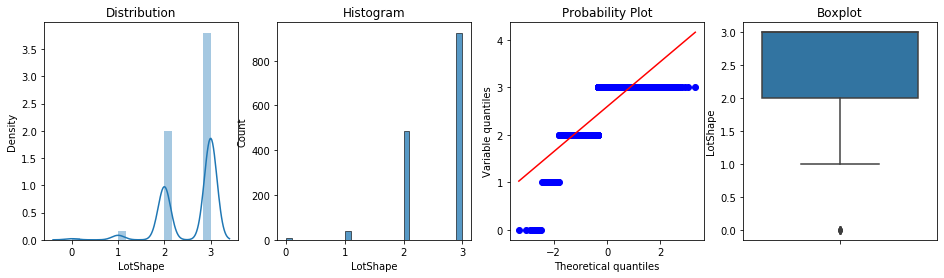

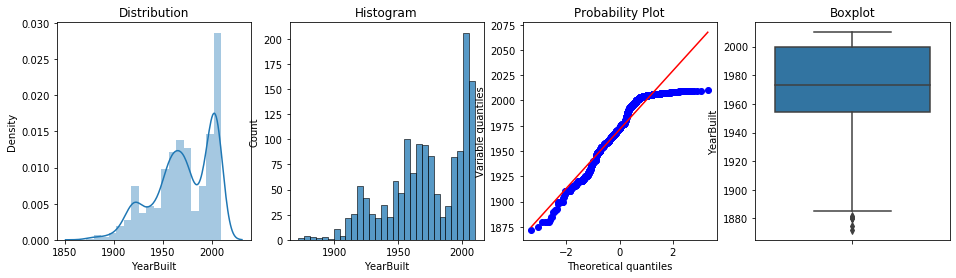

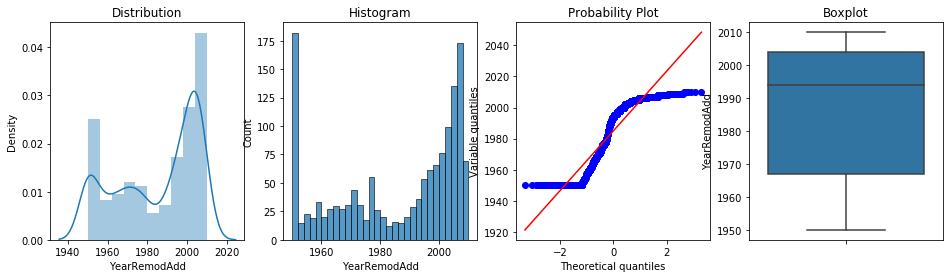

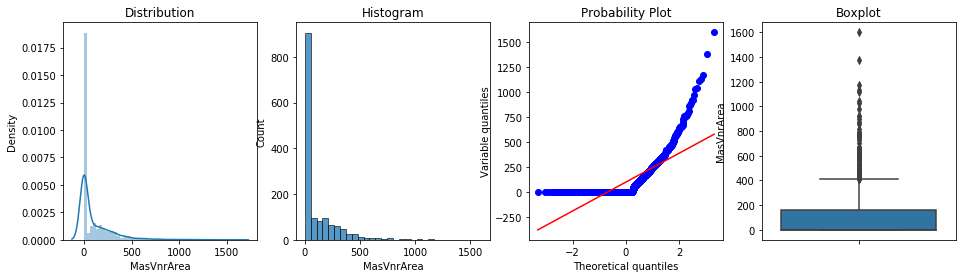

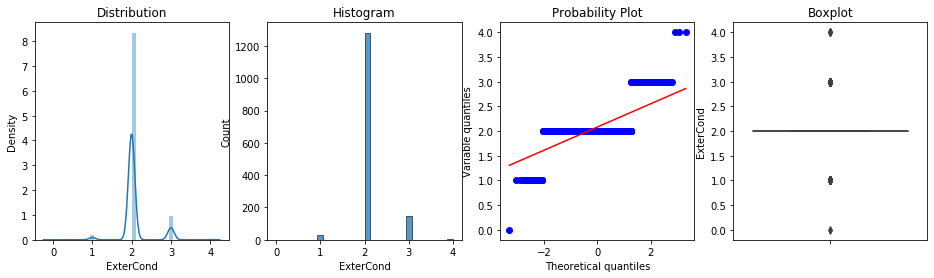

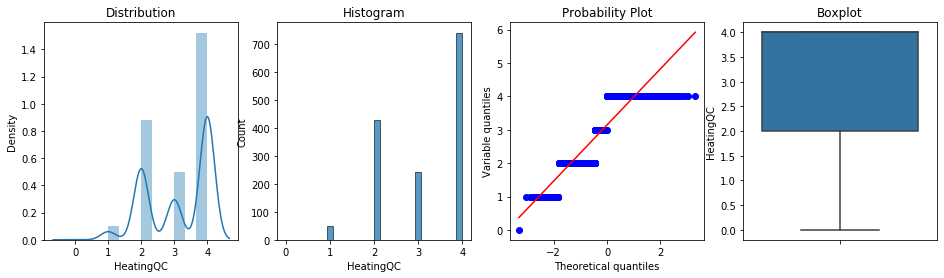

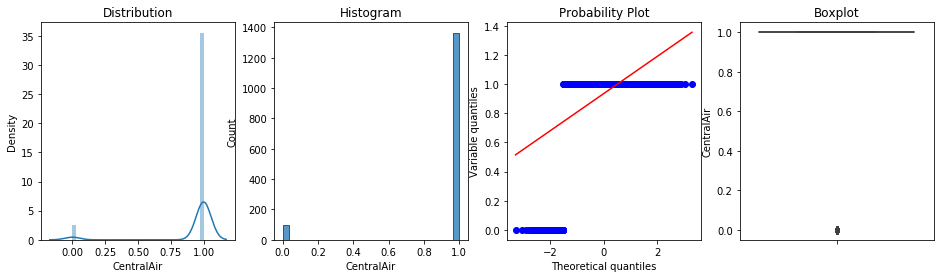

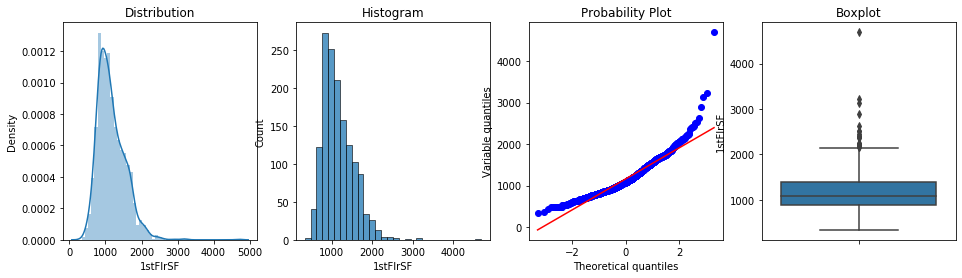

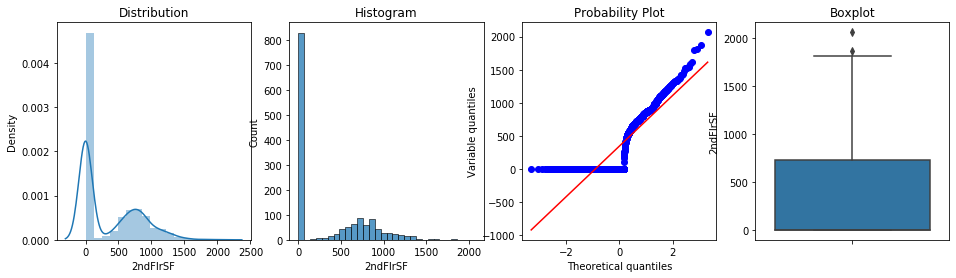

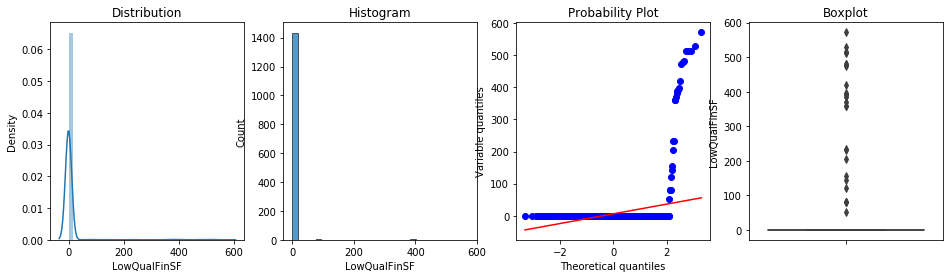

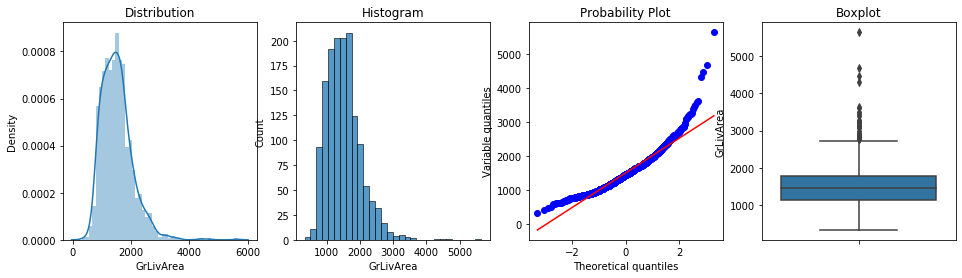

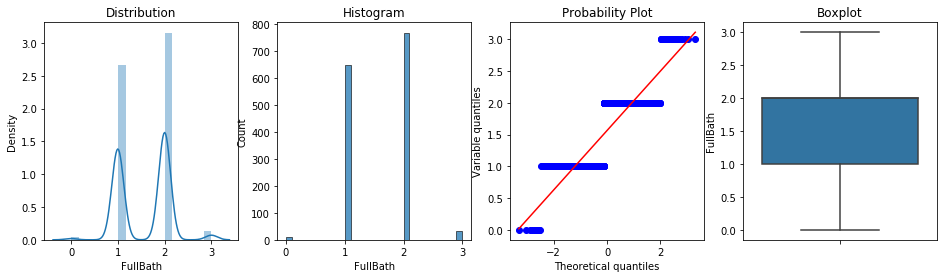

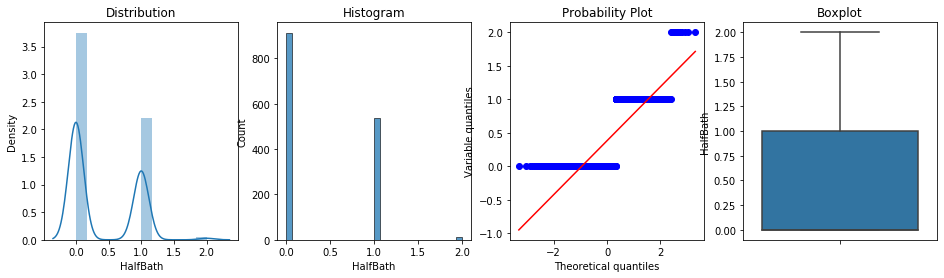

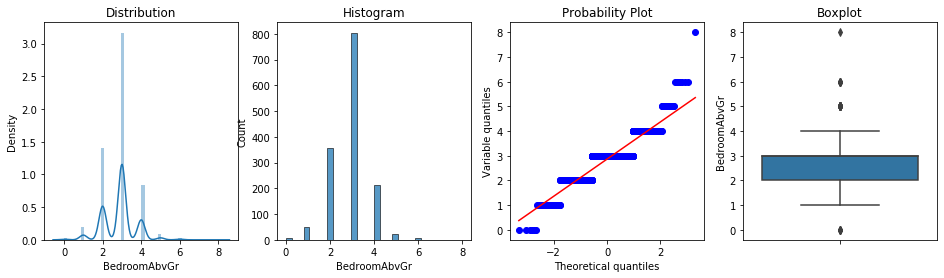

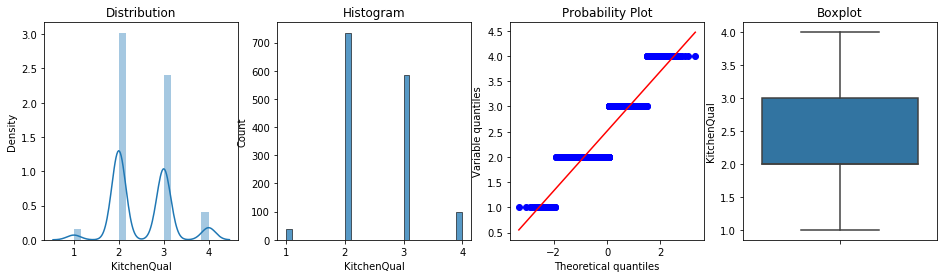

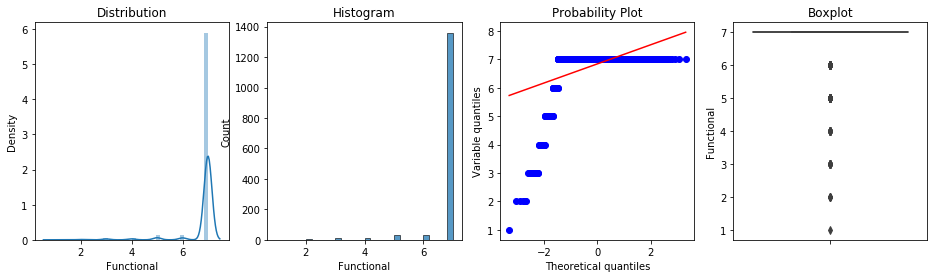

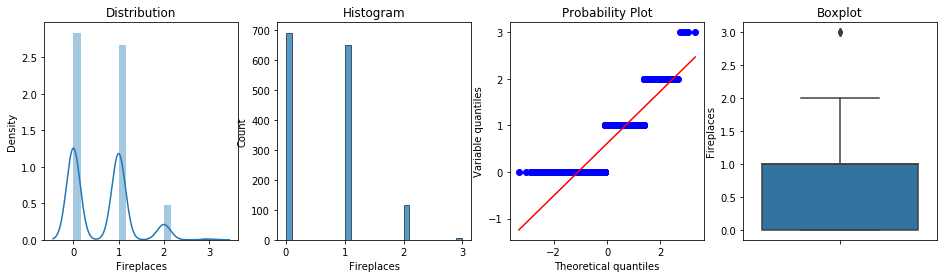

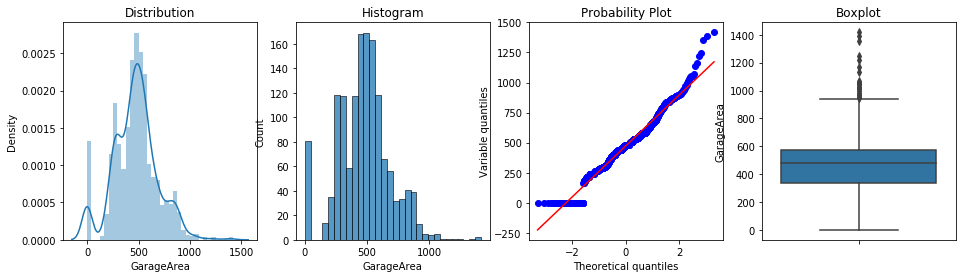

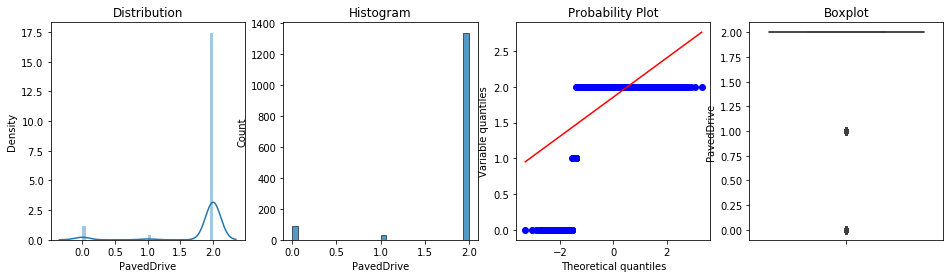

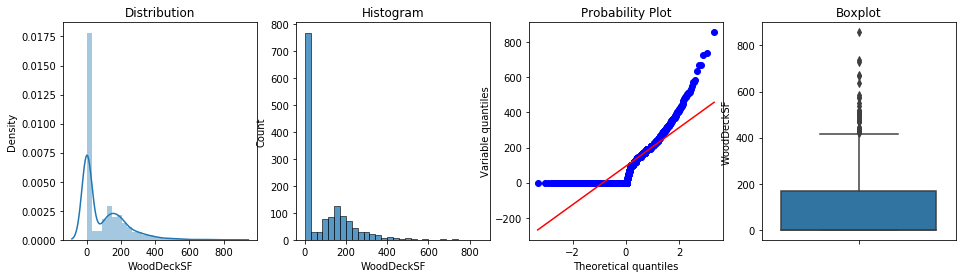

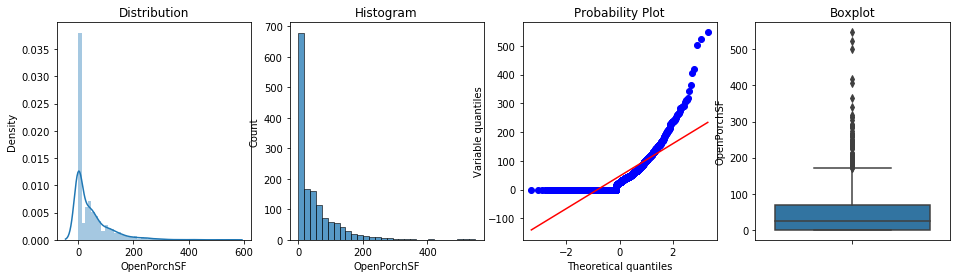

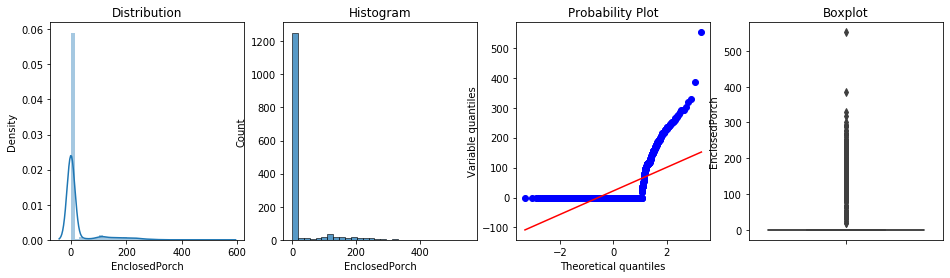

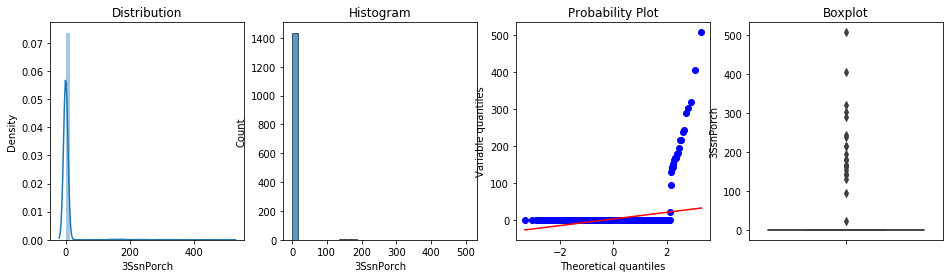

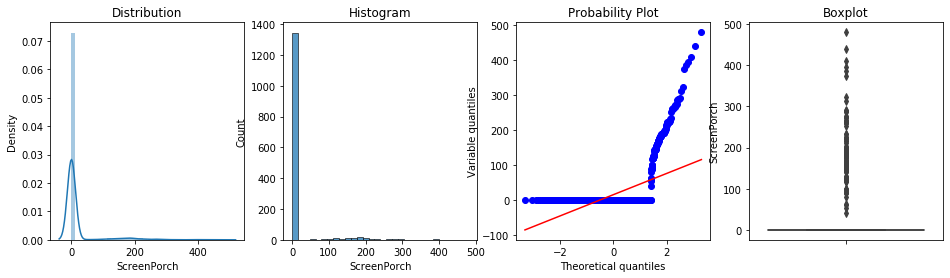

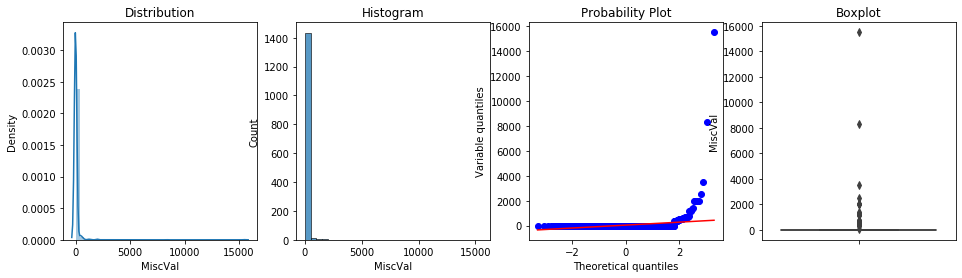

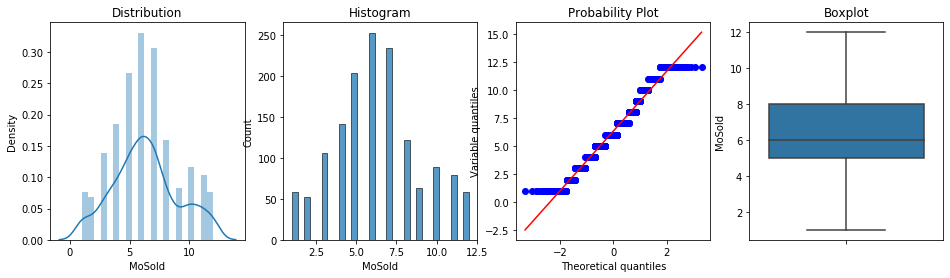

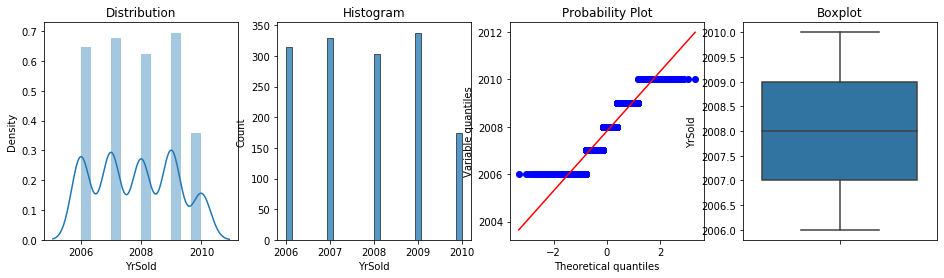

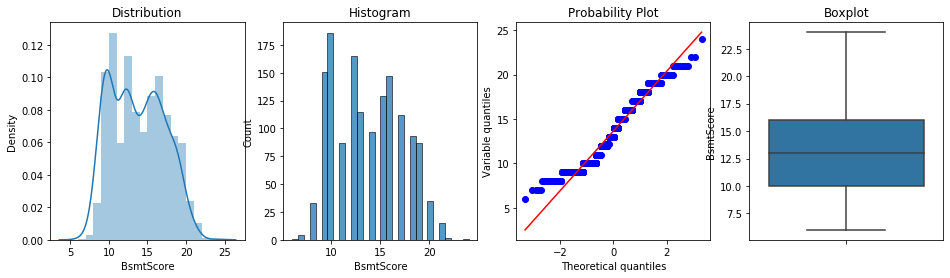

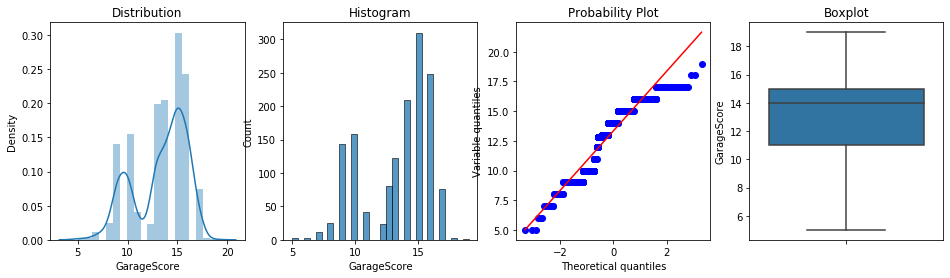

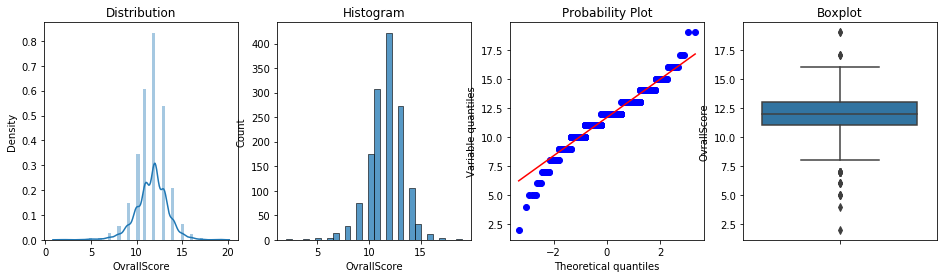

In [137]:
diagnostic_plots(train)

In [138]:

def print_skew(df):
    
    df=df._get_numeric_data()
    for col in df.columns:
        print(col,' ', df[col].skew())

In [139]:
print_skew(train)

MSSubClass   1.4076567471495591
LotFrontage   2.3849501679427925
LotArea   12.207687851233496
LotShape   -1.3099856565559542
YearBuilt   -0.613461172488183
YearRemodAdd   -0.5035620027004709
MasVnrArea   2.676411784729959
ExterCond   1.397218625210802
HeatingQC   -0.5404577451841079
CentralAir   -3.530385595692418
1stFlrSF   1.3767566220336365
2ndFlrSF   0.8130298163023265
LowQualFinSF   9.011341288465387
GrLivArea   1.3665603560164552
FullBath   0.036561558402727165
HalfBath   0.675897448233722
BedroomAbvGr   0.21179009627507137
KitchenQual   0.38676535818427754
Functional   -4.912214312318271
Fireplaces   0.6495651830548841
GarageArea   0.17998090674623907
PavedDrive   -3.3089382951079447
WoodDeckSF   1.5413757571931312
OpenPorchSF   2.3643417403694404
EnclosedPorch   3.08987190371177
3SsnPorch   10.304342032693112
ScreenPorch   4.122213743143115
MiscVal   24.476794188821916
MoSold   0.21205298505146022
YrSold   0.09626851386568028
BsmtScore   0.1861000431269654
GarageScore   -0.6529

In [140]:
# Remove skewness

# for normal symmetry the skewness should be fairly betwen -0.5 to 0.5

def remove_skew(df):
    
    col=df._get_numeric_data().columns
    
    for ele in col:
        
        if abs(df[ele].skew())>0.75:
            df[ele]=np.log(df[ele]+1)


In [141]:
remove_skew(train)

In [142]:
print_skew(train)

MSSubClass   0.2489971096100625
LotFrontage   -0.8919767349062553
LotArea   -0.13740448122837784
LotShape   -2.525946642821323
YearBuilt   -0.613461172488183
YearRemodAdd   -0.5035620027004709
MasVnrArea   0.4811201270555158
ExterCond   -0.2406631397023715
HeatingQC   -0.5404577451841079
CentralAir   -3.530385595692417
1stFlrSF   0.08011408968181778
2ndFlrSF   0.28964345806359637
LowQualFinSF   7.460316514621369
GrLivArea   -0.006140253486287281
FullBath   0.036561558402727165
HalfBath   0.675897448233722
BedroomAbvGr   0.21179009627507137
KitchenQual   0.38676535818427754
Functional   -5.910511880898722
Fireplaces   0.6495651830548841
GarageArea   0.17998090674623907
PavedDrive   -3.432589210903852
WoodDeckSF   0.15353659020909782
OpenPorchSF   -0.02339729485739231
EnclosedPorch   2.1122749483873156
3SsnPorch   7.734974870241933
ScreenPorch   3.150408862444581
MiscVal   5.170703861673264
MoSold   0.21205298505146022
YrSold   0.09626851386568028
BsmtScore   0.1861000431269654
GarageSco

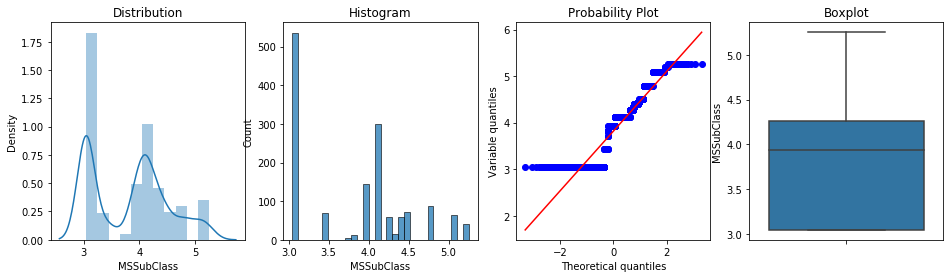

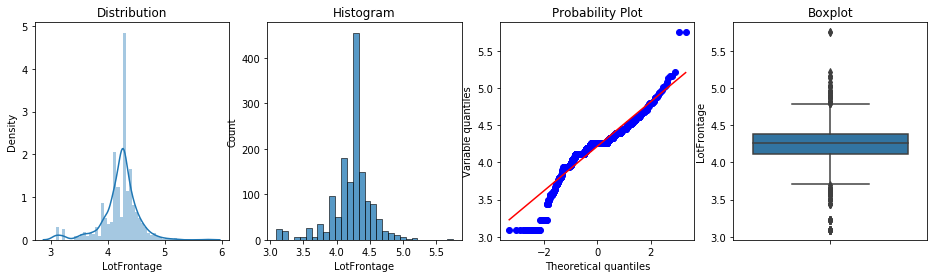

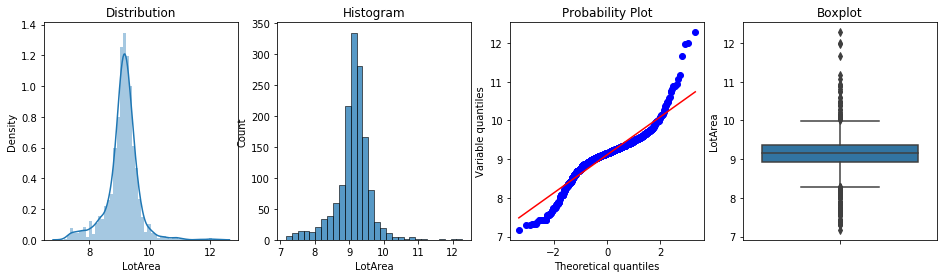

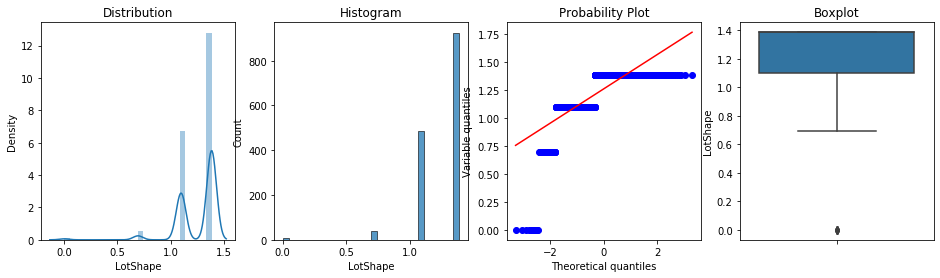

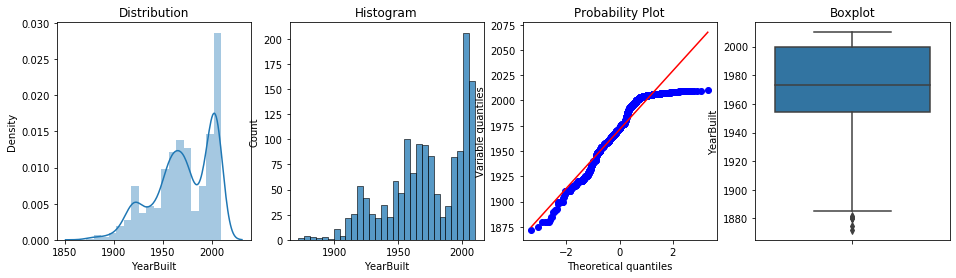

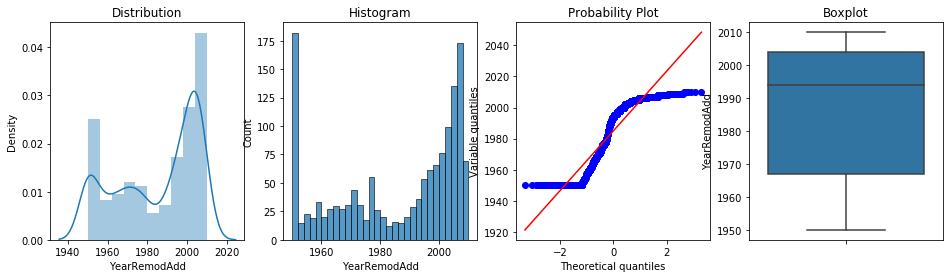

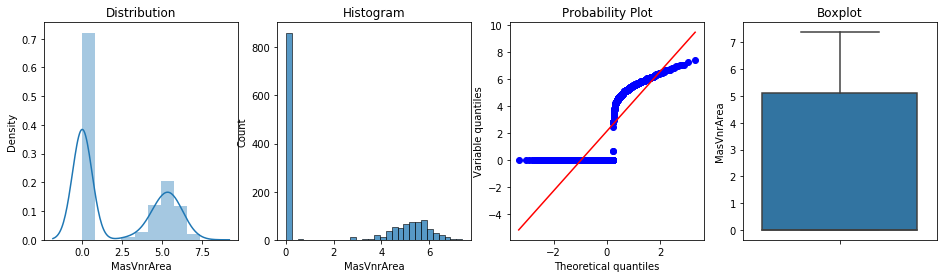

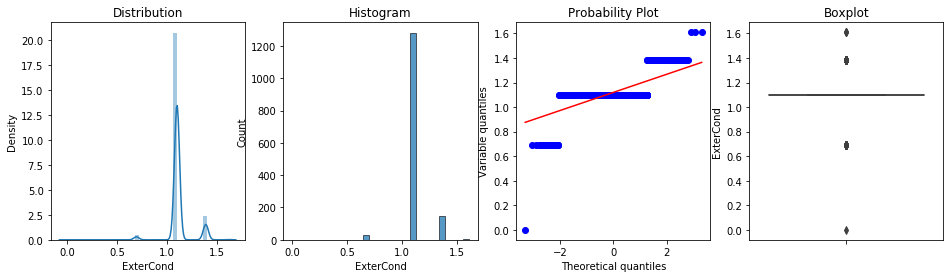

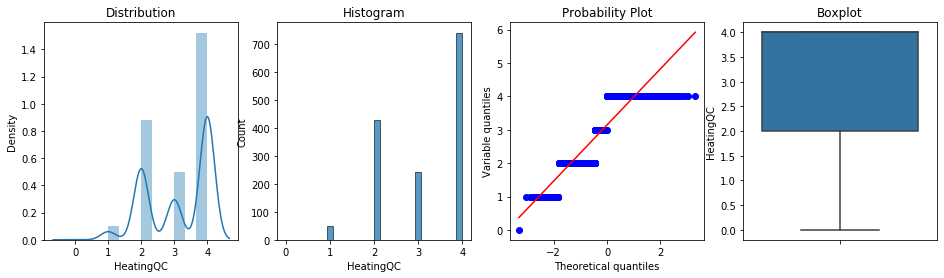

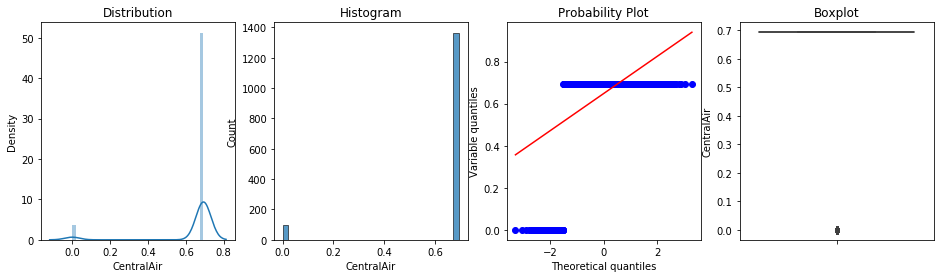

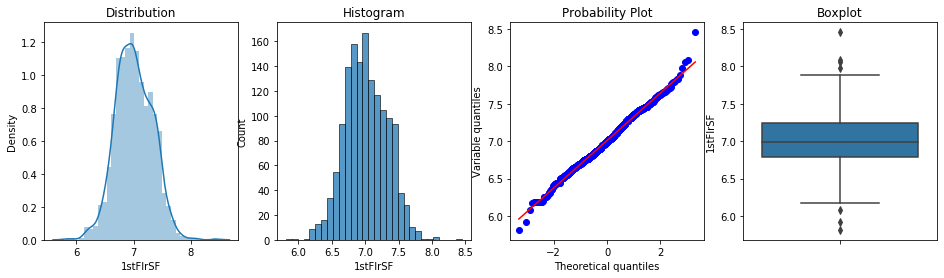

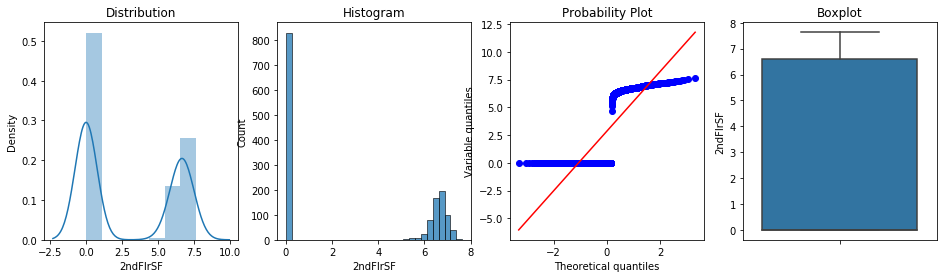

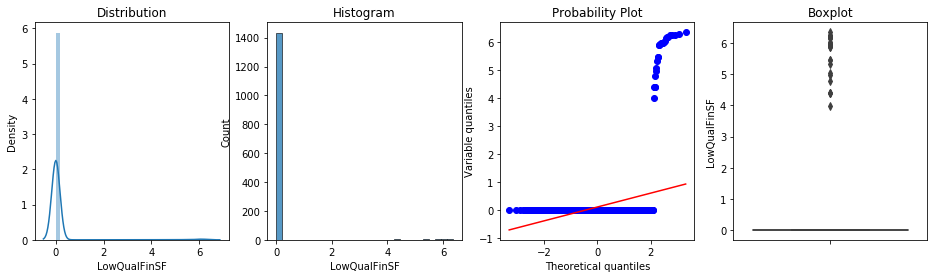

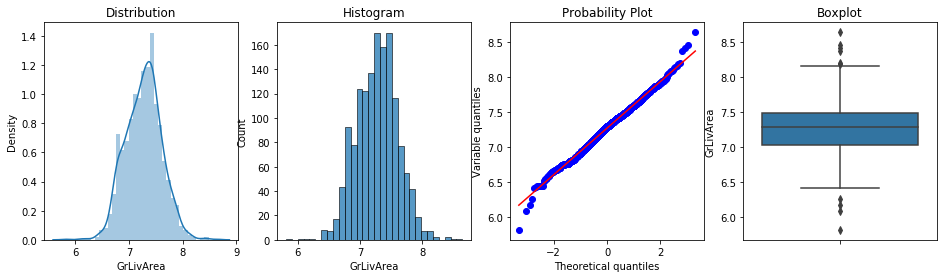

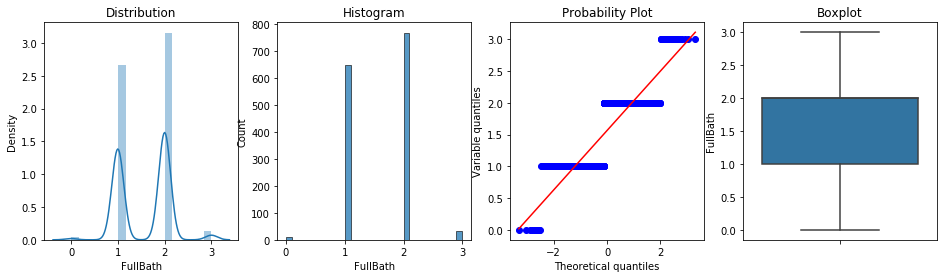

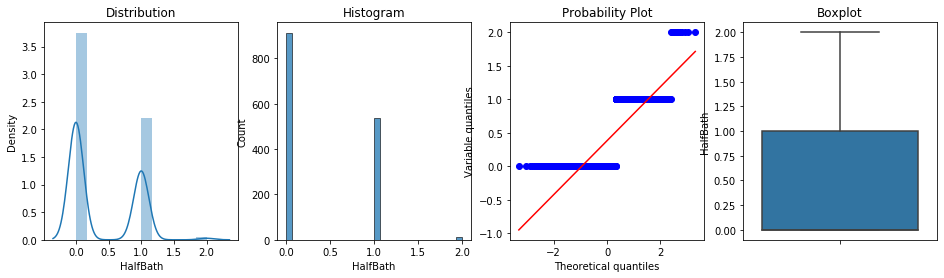

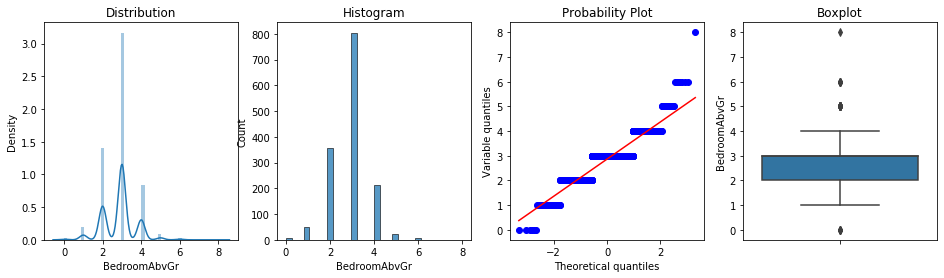

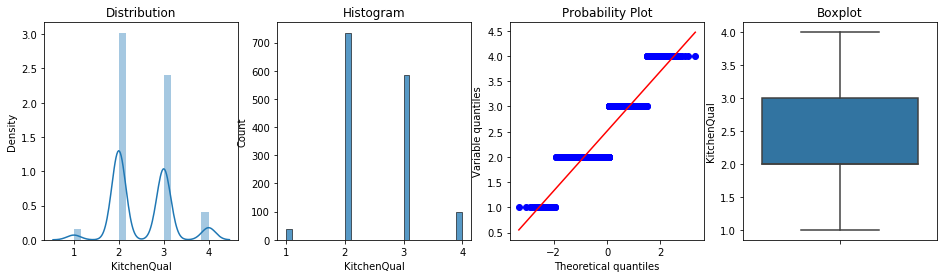

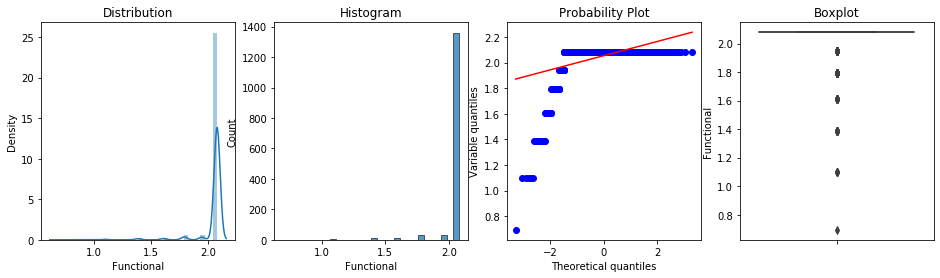

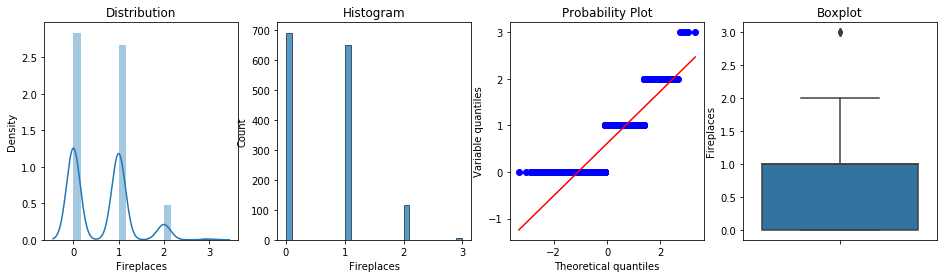

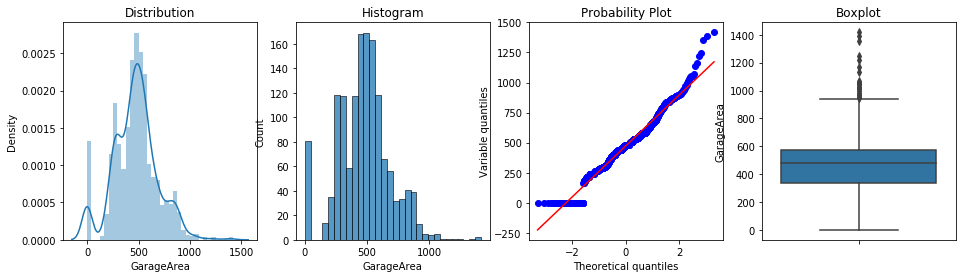

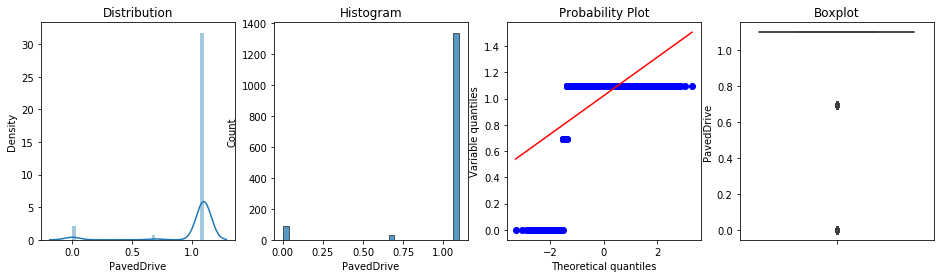

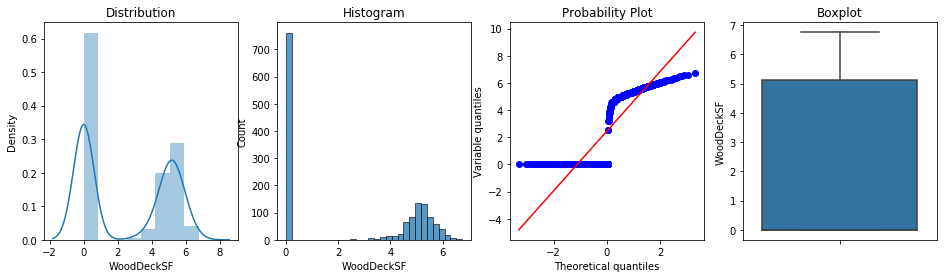

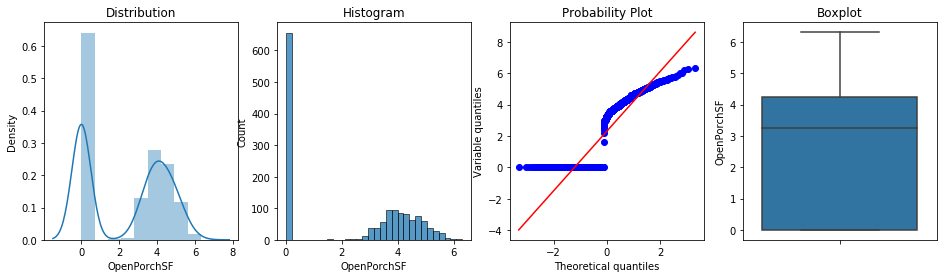

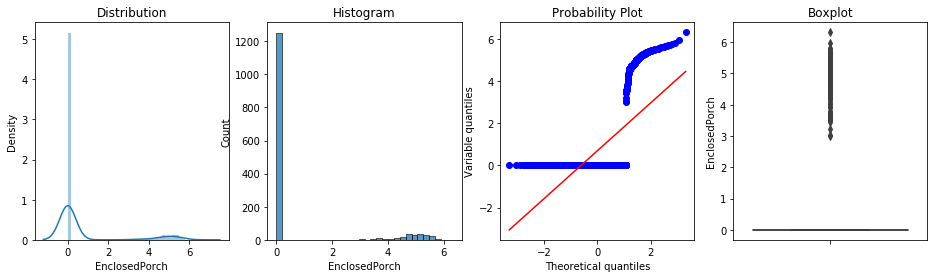

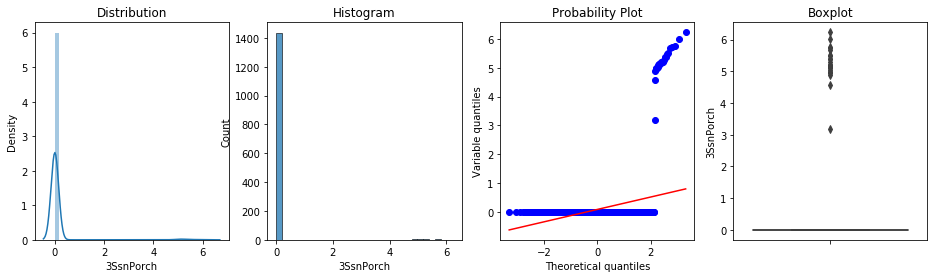

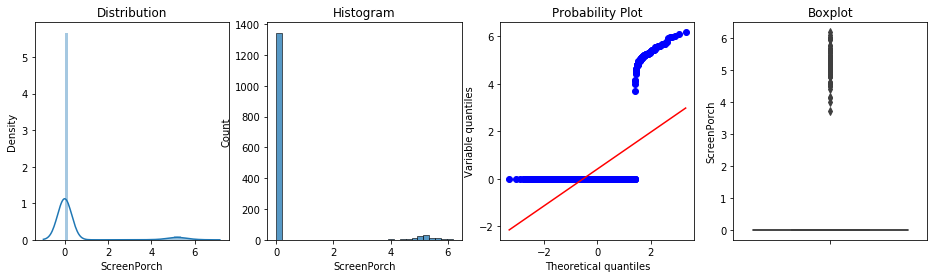

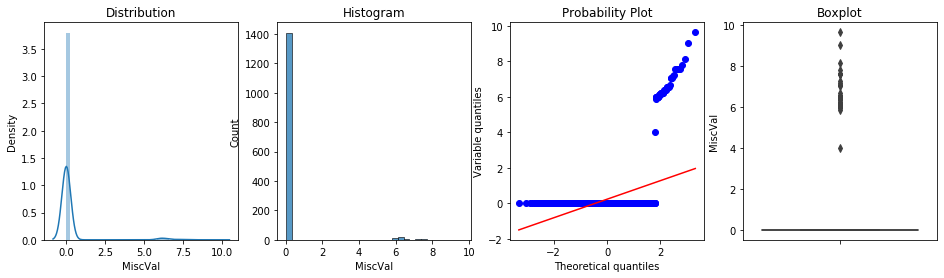

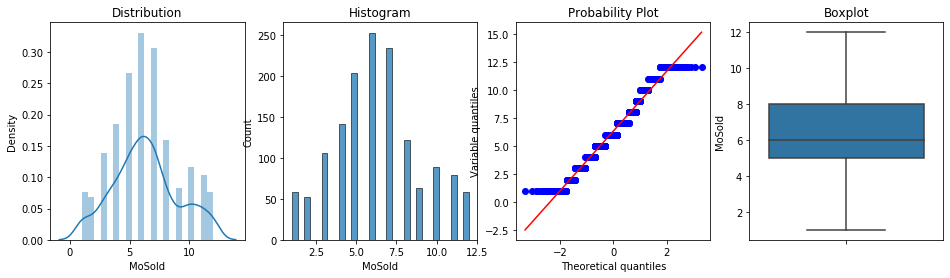

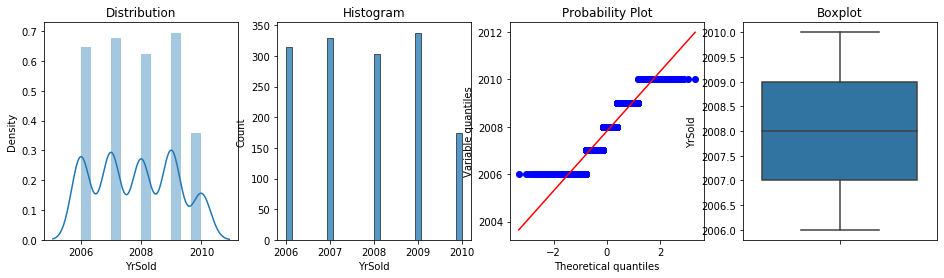

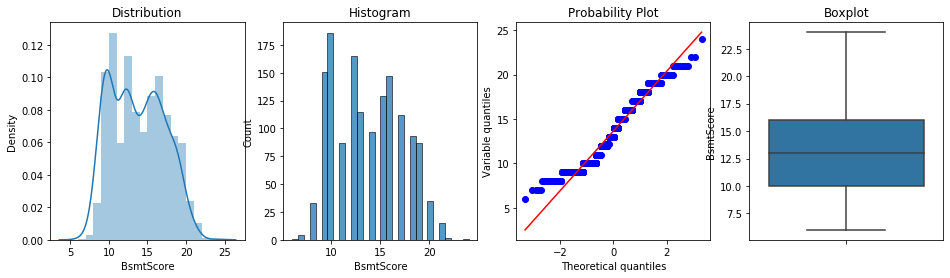

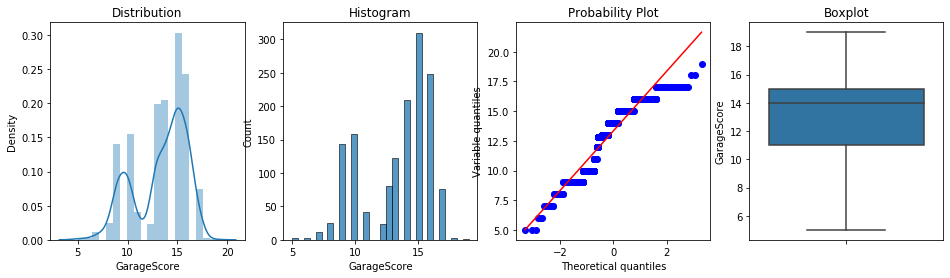

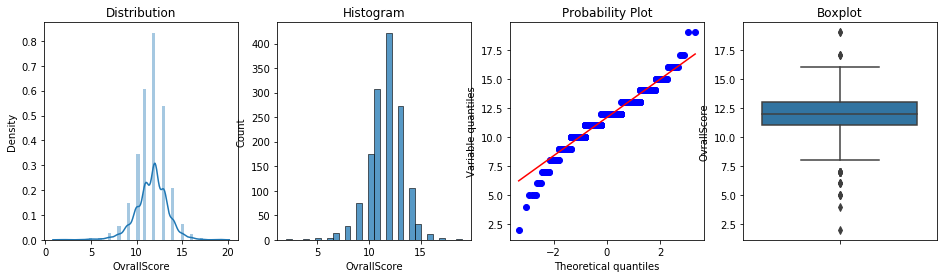

In [143]:
diagnostic_plots(train)

## Deal with outlier

In [144]:
def mod_outlier(df):
        
        num_col = df._get_numeric_data().columns
        
        for col in num_col:

            #q1 = df[col].quantile(0.25)
            #q3 = df[col].quantile(0.75)

            iqr = df[col].quantile(0.75) - df[col].quantile(0.25)    # iqr= q3-q1

            lower_bound = df[col].quantile(0.25) -(2 * iqr) 
            upper_bound = df[col].quantile(0.75) +(2 * iqr)

            df[col]= np.where(df[col] > upper_bound, upper_bound , np.where(df[col] < lower_bound, lower_bound, df[col]))    


In [145]:
mod_outlier(train)

In [146]:
train=pd.get_dummies(train, drop_first=True, columns=train_cat)

#### Splitting the dataset into the Training set and Test set

In [157]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.2, random_state = 43)

## Feature scaling

In [148]:
#Common for all model

#feature scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [149]:
def accuracy(yt,yp):
    return round(metrics.r2_score(yt, yp)*100 , 2)


model_acc={}

## Random Forest

In [150]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 43)
regressor.fit(X_train, y_train)

y_pred = (regressor.predict(X_test))

model_acc['Random Forest']=accuracy(y_test, y_pred)

## decision tree

In [151]:
regressor = DecisionTreeRegressor(random_state = 43)
regressor.fit(X_train, y_train)

y_pred = (regressor.predict(X_test))

model_acc['Decision Tree']=accuracy(y_test, y_pred)

## MultipleRegression module

In [158]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = (regressor.predict(X_test))

model_acc['MultipleRegression Module']=accuracy(y_test, y_pred)

## SVM

In [164]:
regressor = SVR(kernel = 'linear')
regressor.fit(X_train, y_train)

y_pred = (regressor.predict(X_test))

model_acc['SVM']=accuracy(y_test, y_pred)

## XGBOOST

In [154]:
regressor = XGBRegressor()
regressor.fit(X_train,y_train)

y_pred = (regressor.predict(X_test))

model_acc['XGBOOST']=accuracy(y_test, y_pred)

[16:57:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [165]:
model_acc

{'Random Forest': 83.4,
 'Decision Tree': 60.93,
 'MultipleRegression Module': 79.02,
 'SVM': 53.6,
 'XGBOOST': 83.94}

In [ ]:
testPred = regressor.predict(test)

In [ ]:
testPred

In [ ]:
score= cross_val_score(LinearRegression(),train,SalePrc,cv=KFold(10))

In [ ]:
score.mean()

In [ ]:
score= cross_val_score(XGBRegressor(),train,SalePrc,cv=KFold(10))

In [ ]:
score.mean()

In [ ]:
score= cross_val_score(RandomForestRegressor(n_estimators = 100, random_state = 43),train,SalePrc,cv=KFold(10))

In [ ]:
score.mean()

In [ ]:
test.head(3)

In [ ]:
# Create a submisison dataframe and append the relevant columns

submit=pd.DataFrame()
submit['Id'] = test_ID
submit['SalePrice'] = testPred # our model predictions on the test dataset
submit.head()

In [ ]:
len(submit) == len(test)

In [ ]:
# Convert submisison dataframe to csv for submission to csv 
# for Kaggle submisison
submit.to_csv('../XGboost_housePrie.csv', index=False)
print('Submission CSV is ready!')

In [ ]:
submissions_check = pd.read_csv("../XGboost_housePrie.csv")
submissions_check.head()